In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing  import LabelEncoder
from sklearn.preprocessing import StandardScaler 
import warnings
warnings.filterwarnings('ignore')

In [2]:
salary_test = pd.read_csv("C:\\Users\\sunee\\Desktop\\data science total\\assignments\\new svm test and train data\\SalaryData_Test(1).csv")
salary_train = pd.read_csv("C:\\Users\\sunee\\Desktop\\data science total\\assignments\\new svm test and train data\\SalaryData_Train(1).csv")

### Performing initial analysis for train data and test data sets

In [3]:
salary_train

age          workclass    education  educationno        maritalstatus  \
0       39          State-gov    Bachelors           13        Never-married   
1       50   Self-emp-not-inc    Bachelors           13   Married-civ-spouse   
2       38            Private      HS-grad            9             Divorced   
3       53            Private         11th            7   Married-civ-spouse   
4       28            Private    Bachelors           13   Married-civ-spouse   
...    ...                ...          ...          ...                  ...   
30156   27            Private   Assoc-acdm           12   Married-civ-spouse   
30157   40            Private      HS-grad            9   Married-civ-spouse   
30158   58            Private      HS-grad            9              Widowed   
30159   22            Private      HS-grad            9        Never-married   
30160   52       Self-emp-inc      HS-grad            9   Married-civ-spouse   

               occupation    relationship    race      sex  capitalgain  \
0            Adm-clerical   Not-in-family   White     Male         2174   
1         Exec-managerial         Husband   White     Male            0   
2       Handlers-cleaners   Not-in-family   White     Male            0   
3       Handlers-cleaners         Husband   Black     Male            0   
4          Prof-specialty            Wife   Black   Female            0   
...                   ...             ...     ...      ...          ...   
30156        Tech-support            Wife   White   Female            0   
30157   Machine-op-inspct         Husband   White     Male            0   
30158        Adm-clerical       Unmarried   White   Female            0   
30159        Adm-clerical       Own-child   White     Male            0   
30160     Exec-managerial            Wife   White   Female        15024   

       capitalloss  hoursperweek          native  Salary  
0                0            40   United-States   <=50K  
1                0            13   United-States   <=50K  
2                0            40   United-States   <=50K  
3                0            40   United-States   <=50K  
4                0            40            Cuba   <=50K  
...            ...           ...             ...     ...  
30156            0            38   United-States   <=50K  
30157            0            40   United-States    >50K  
30158            0            40   United-States   <=50K  
30159            0            20   United-States   <=50K  
30160            0            40   United-States    >50K  

[30161 rows x 14 columns]

In [4]:
salary_train.head()

age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            13   United-States   <=50K  
2            0            40   United-States   <=50K  
3            0            40   United-States   <=50K  
4            0            40            Cuba   <=50K

In [5]:
salary_train.tail()

age      workclass    education  educationno        maritalstatus  \
30156   27        Private   Assoc-acdm           12   Married-civ-spouse   
30157   40        Private      HS-grad            9   Married-civ-spouse   
30158   58        Private      HS-grad            9              Widowed   
30159   22        Private      HS-grad            9        Never-married   
30160   52   Self-emp-inc      HS-grad            9   Married-civ-spouse   

               occupation relationship    race      sex  capitalgain  \
30156        Tech-support         Wife   White   Female            0   
30157   Machine-op-inspct      Husband   White     Male            0   
30158        Adm-clerical    Unmarried   White   Female            0   
30159        Adm-clerical    Own-child   White     Male            0   
30160     Exec-managerial         Wife   White   Female        15024   

       capitalloss  hoursperweek          native  Salary  
30156            0            38   United-States   <=50K  
30157            0            40   United-States    >50K  
30158            0            40   United-States   <=50K  
30159            0            20   United-States   <=50K  
30160            0            40   United-States    >50K

In [6]:
salary_test

age      workclass      education  educationno        maritalstatus  \
0       25        Private           11th            7        Never-married   
1       38        Private        HS-grad            9   Married-civ-spouse   
2       28      Local-gov     Assoc-acdm           12   Married-civ-spouse   
3       44        Private   Some-college           10   Married-civ-spouse   
4       34        Private           10th            6        Never-married   
...    ...            ...            ...          ...                  ...   
15055   33        Private      Bachelors           13        Never-married   
15056   39        Private      Bachelors           13             Divorced   
15057   38        Private      Bachelors           13   Married-civ-spouse   
15058   44        Private      Bachelors           13             Divorced   
15059   35   Self-emp-inc      Bachelors           13   Married-civ-spouse   

               occupation    relationship                 race      sex  \
0       Machine-op-inspct       Own-child                Black     Male   
1         Farming-fishing         Husband                White     Male   
2         Protective-serv         Husband                White     Male   
3       Machine-op-inspct         Husband                Black     Male   
4           Other-service   Not-in-family                White     Male   
...                   ...             ...                  ...      ...   
15055      Prof-specialty       Own-child                White     Male   
15056      Prof-specialty   Not-in-family                White   Female   
15057      Prof-specialty         Husband                White     Male   
15058        Adm-clerical       Own-child   Asian-Pac-Islander     Male   
15059     Exec-managerial         Husband                White     Male   

       capitalgain  capitalloss  hoursperweek          native  Salary  
0                0            0            40   United-States   <=50K  
1                0            0            50   United-States   <=50K  
2                0            0            40   United-States    >50K  
3             7688            0            40   United-States    >50K  
4                0            0            30   United-States   <=50K  
...            ...          ...           ...             ...     ...  
15055            0            0            40   United-States   <=50K  
15056            0            0            36   United-States   <=50K  
15057            0            0            50   United-States   <=50K  
15058         5455            0            40   United-States   <=50K  
15059            0            0            60   United-States    >50K  

[15060 rows x 14 columns]

In [7]:
salary_test.head()

age   workclass      education  educationno        maritalstatus  \
0   25     Private           11th            7        Never-married   
1   38     Private        HS-grad            9   Married-civ-spouse   
2   28   Local-gov     Assoc-acdm           12   Married-civ-spouse   
3   44     Private   Some-college           10   Married-civ-spouse   
4   34     Private           10th            6        Never-married   

           occupation    relationship    race    sex  capitalgain  \
0   Machine-op-inspct       Own-child   Black   Male            0   
1     Farming-fishing         Husband   White   Male            0   
2     Protective-serv         Husband   White   Male            0   
3   Machine-op-inspct         Husband   Black   Male         7688   
4       Other-service   Not-in-family   White   Male            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            50   United-States   <=50K  
2            0            40   United-States    >50K  
3            0            40   United-States    >50K  
4            0            30   United-States   <=50K

In [8]:
salary_test.tail()

age      workclass   education  educationno        maritalstatus  \
15055   33        Private   Bachelors           13        Never-married   
15056   39        Private   Bachelors           13             Divorced   
15057   38        Private   Bachelors           13   Married-civ-spouse   
15058   44        Private   Bachelors           13             Divorced   
15059   35   Self-emp-inc   Bachelors           13   Married-civ-spouse   

             occupation    relationship                 race      sex  \
15055    Prof-specialty       Own-child                White     Male   
15056    Prof-specialty   Not-in-family                White   Female   
15057    Prof-specialty         Husband                White     Male   
15058      Adm-clerical       Own-child   Asian-Pac-Islander     Male   
15059   Exec-managerial         Husband                White     Male   

       capitalgain  capitalloss  hoursperweek          native  Salary  
15055            0            0            40   United-States   <=50K  
15056            0            0            36   United-States   <=50K  
15057            0            0            50   United-States   <=50K  
15058         5455            0            40   United-States   <=50K  
15059            0            0            60   United-States    >50K

In [9]:
salary_train.shape

(30161, 14)

In [10]:
salary_test.shape

(15060, 14)

### Performing EDA

In [11]:
salary_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [12]:
salary_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

##### There is no null values for training and testing data

In [13]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [14]:
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [15]:
salary_train.select_dtypes(include=['int64']).dtypes

age             int64
educationno     int64
capitalgain     int64
capitalloss     int64
hoursperweek    int64
dtype: object

In [16]:
salary_test.select_dtypes(include=['int64']).dtypes

age             int64
educationno     int64
capitalgain     int64
capitalloss     int64
hoursperweek    int64
dtype: object

In [17]:
salary_train.skew()

age              0.530180
educationno     -0.305378
capitalgain     11.902483
capitalloss      4.528238
hoursperweek     0.330856
dtype: float64

In [18]:
salary_test.skew()

age              0.536112
educationno     -0.320999
capitalgain     11.570156
capitalloss      4.496738
hoursperweek     0.359502
dtype: float64

In [19]:
salary_train.describe()

age   educationno   capitalgain   capitalloss  hoursperweek
count  30161.000000  30161.000000  30161.000000  30161.000000  30161.000000
mean      38.438115     10.121316   1092.044064     88.302311     40.931269
std       13.134830      2.550037   7406.466611    404.121321     11.980182
min       17.000000      1.000000      0.000000      0.000000      1.000000
25%       28.000000      9.000000      0.000000      0.000000     40.000000
50%       37.000000     10.000000      0.000000      0.000000     40.000000
75%       47.000000     13.000000      0.000000      0.000000     45.000000
max       90.000000     16.000000  99999.000000   4356.000000     99.000000

In [20]:
salary_test.describe()

age   educationno   capitalgain   capitalloss  hoursperweek
count  15060.000000  15060.000000  15060.000000  15060.000000  15060.000000
mean      38.768327     10.112749   1120.301594     89.041899     40.951594
std       13.380676      2.558727   7703.181842    406.283245     12.062831
min       17.000000      1.000000      0.000000      0.000000      1.000000
25%       28.000000      9.000000      0.000000      0.000000     40.000000
50%       37.000000     10.000000      0.000000      0.000000     40.000000
75%       48.000000     13.000000      0.000000      0.000000     45.000000
max       90.000000     16.000000  99999.000000   3770.000000     99.000000

#### Checking outliers and data distribution of train data

<AxesSubplot:>

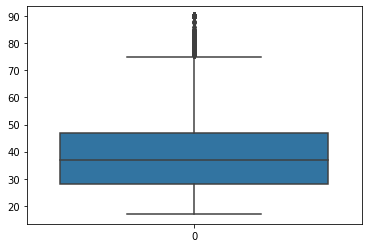

In [21]:
sns.boxplot(data=[salary_train['age']])

<AxesSubplot:xlabel='age', ylabel='Density'>

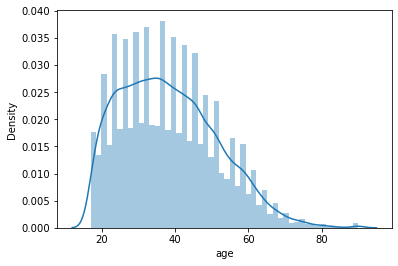

In [22]:
sns.distplot(salary_train['age'])

<AxesSubplot:>

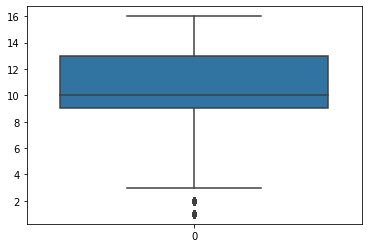

In [23]:
sns.boxplot(data=[salary_train['educationno']])

<AxesSubplot:xlabel='educationno', ylabel='Density'>

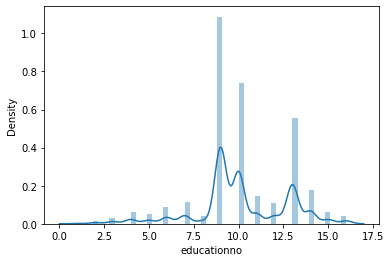

In [24]:
sns.distplot(salary_train['educationno'])

<AxesSubplot:>

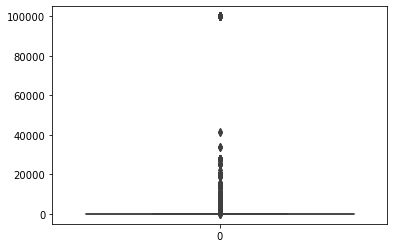

In [25]:
sns.boxplot(data=[salary_train['capitalgain']])

<AxesSubplot:xlabel='capitalgain', ylabel='Density'>

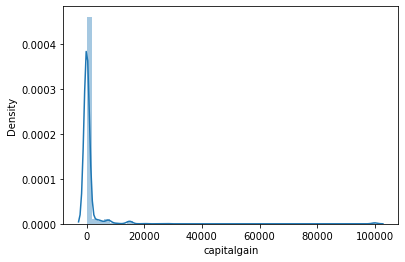

In [26]:
sns.distplot(salary_train['capitalgain'])

<AxesSubplot:>

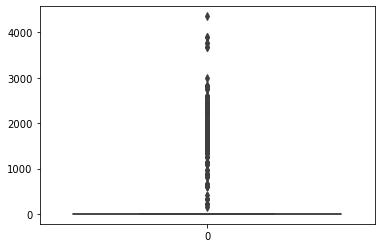

In [27]:
sns.boxplot(data=[salary_train['capitalloss']])

<AxesSubplot:xlabel='capitalloss', ylabel='Density'>

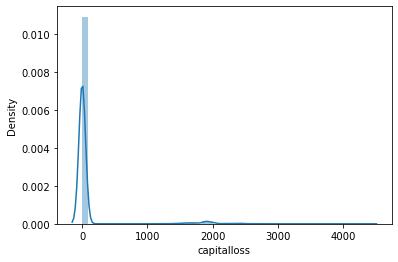

In [28]:
sns.distplot(salary_train['capitalloss'])

### checking outliers and data distribution of testing data

<AxesSubplot:>

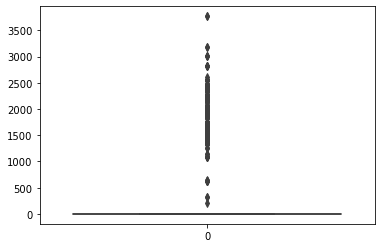

In [29]:
sns.boxplot(data=[salary_test['capitalloss']])

<AxesSubplot:xlabel='capitalloss', ylabel='Density'>

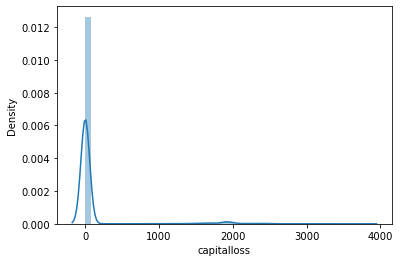

In [30]:
sns.distplot(salary_test['capitalloss'])

<AxesSubplot:>

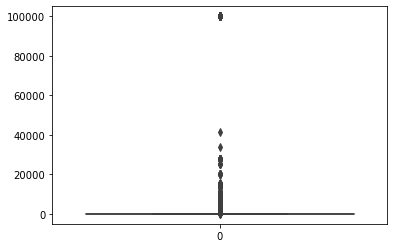

In [31]:
sns.boxplot(data=[salary_test['capitalgain']])

<AxesSubplot:xlabel='capitalgain', ylabel='Density'>

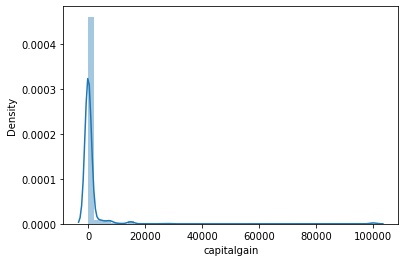

In [32]:
sns.distplot(salary_test['capitalgain'])

<AxesSubplot:>

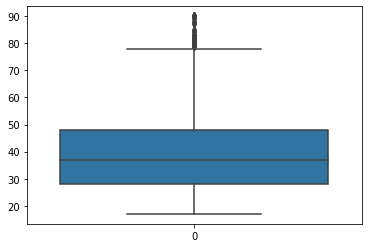

In [33]:
sns.boxplot(data=[salary_test['age']])

<AxesSubplot:xlabel='age', ylabel='Density'>

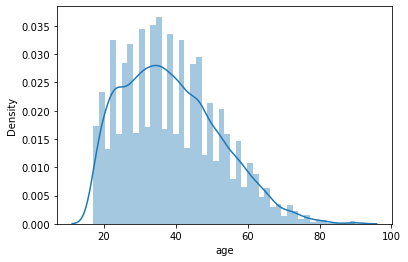

In [34]:
sns.distplot(salary_test['age'])

<AxesSubplot:>

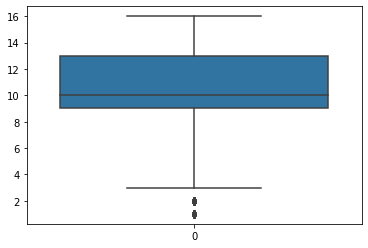

In [35]:
sns.boxplot(data=[salary_test['educationno']])

<AxesSubplot:xlabel='educationno', ylabel='Density'>

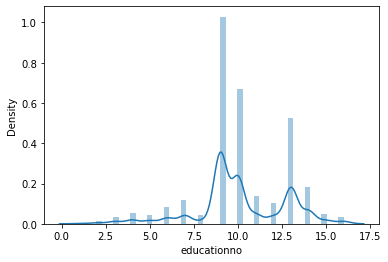

In [36]:
sns.distplot(salary_test['educationno'])

In [37]:
salary_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [38]:
salary_test['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

##### detecting outliers with IQR

In [39]:
Q1 = salary_train.age.quantile(0.25)
Q3 = salary_train.age.quantile(0.75)
print(Q1,Q3)

28.0 47.0


In [40]:
IQR = Q3-Q1
print(IQR)

19.0


In [41]:
lower_limit = Q1 - 1.5*(IQR)
upper_limit = Q3 + 1.5*(IQR)
print(lower_limit,upper_limit)

-0.5 75.5


In [42]:
salary_train[(salary_train.age<lower_limit)|(salary_train.age>upper_limit)]

age          workclass      education  educationno  \
68      79            Private   Some-college           10   
92      76            Private        Masters           14   
206     90            Private        HS-grad            9   
293     77   Self-emp-not-inc   Some-college           10   
301     76   Self-emp-not-inc        Masters           14   
...    ...                ...            ...          ...   
29469   80   Self-emp-not-inc        7th-8th            4   
29508   82   Self-emp-not-inc        HS-grad            9   
29900   90            Private        HS-grad            9   
29982   90          Local-gov        7th-8th            4   
30071   85            Private      Bachelors           13   

             maritalstatus        occupation     relationship    race  \
68      Married-civ-spouse    Prof-specialty   Other-relative   White   
92      Married-civ-spouse   Exec-managerial          Husband   White   
206          Never-married     Other-service    Not-in-family   Black   
293     Married-civ-spouse             Sales          Husband   White   
301     Married-civ-spouse      Craft-repair          Husband   White   
...                    ...               ...              ...     ...   
29469        Never-married   Farming-fishing        Unmarried   White   
29508   Married-civ-spouse   Farming-fishing          Husband   White   
29900              Widowed      Adm-clerical        Unmarried   White   
29982   Married-civ-spouse   Protective-serv          Husband   White   
30071   Married-civ-spouse   Exec-managerial          Husband   White   

           sex  capitalgain  capitalloss  hoursperweek          native  Salary  
68        Male            0            0            20   United-States   <=50K  
92        Male            0            0            40   United-States    >50K  
206       Male            0         2206            40   United-States   <=50K  
293       Male            0            0            40   United-States   <=50K  
301       Male            0            0            10   United-States   <=50K  
...        ...          ...          ...           ...             ...     ...  
29469     Male            0            0            20   United-States   <=50K  
29508     Male            0            0            20   United-States   <=50K  
29900   Female            0            0            25   United-States   <=50K  
29982     Male         2653            0            40   United-States   <=50K  
30071     Male            0            0             3          Poland   <=50K  

[169 rows x 14 columns]

In [43]:
salary_train = salary_train[(salary_train.age>lower_limit) & (salary_train.age<upper_limit)]

In [44]:
salary_train

age          workclass    education  educationno        maritalstatus  \
0       39          State-gov    Bachelors           13        Never-married   
1       50   Self-emp-not-inc    Bachelors           13   Married-civ-spouse   
2       38            Private      HS-grad            9             Divorced   
3       53            Private         11th            7   Married-civ-spouse   
4       28            Private    Bachelors           13   Married-civ-spouse   
...    ...                ...          ...          ...                  ...   
30156   27            Private   Assoc-acdm           12   Married-civ-spouse   
30157   40            Private      HS-grad            9   Married-civ-spouse   
30158   58            Private      HS-grad            9              Widowed   
30159   22            Private      HS-grad            9        Never-married   
30160   52       Self-emp-inc      HS-grad            9   Married-civ-spouse   

               occupation    relationship    race      sex  capitalgain  \
0            Adm-clerical   Not-in-family   White     Male         2174   
1         Exec-managerial         Husband   White     Male            0   
2       Handlers-cleaners   Not-in-family   White     Male            0   
3       Handlers-cleaners         Husband   Black     Male            0   
4          Prof-specialty            Wife   Black   Female            0   
...                   ...             ...     ...      ...          ...   
30156        Tech-support            Wife   White   Female            0   
30157   Machine-op-inspct         Husband   White     Male            0   
30158        Adm-clerical       Unmarried   White   Female            0   
30159        Adm-clerical       Own-child   White     Male            0   
30160     Exec-managerial            Wife   White   Female        15024   

       capitalloss  hoursperweek          native  Salary  
0                0            40   United-States   <=50K  
1                0            13   United-States   <=50K  
2                0            40   United-States   <=50K  
3                0            40   United-States   <=50K  
4                0            40            Cuba   <=50K  
...            ...           ...             ...     ...  
30156            0            38   United-States   <=50K  
30157            0            40   United-States    >50K  
30158            0            40   United-States   <=50K  
30159            0            20   United-States   <=50K  
30160            0            40   United-States    >50K  

[29992 rows x 14 columns]

<AxesSubplot:>

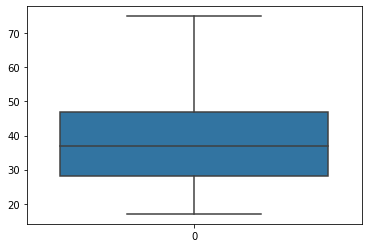

In [45]:
sns.boxplot(data=[salary_train['age']])

<AxesSubplot:xlabel='age', ylabel='Density'>

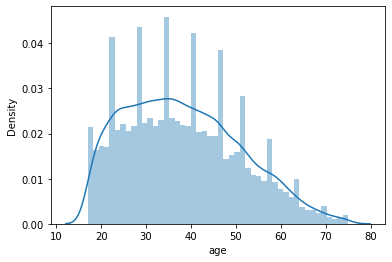

In [46]:
 sns.distplot(salary_train['age'])

In [47]:
Q1 = salary_train.educationno.quantile(0.25)
Q3 = salary_train.educationno.quantile(0.75)
print(Q1,Q3)

9.0 13.0


In [48]:
IQR = Q3 - Q1
print(IQR)

4.0


In [49]:
lower_limit = Q1 - 1.5*(IQR)
upper_limit = Q3 + 1.5*(IQR)
print(lower_limit,upper_limit)

3.0 19.0


In [50]:
salary_train[(salary_train.educationno < lower_limit)|(salary_train.educationno > upper_limit)]

age   workclass   education  educationno           maritalstatus  \
208     53   Local-gov   Preschool            1           Never-married   
386     52     Private     1st-4th            2      Married-civ-spouse   
428     50     Private     1st-4th            2   Married-spouse-absent   
493     57     Private     1st-4th            2                 Widowed   
855     33     Private     1st-4th            2   Married-spouse-absent   
...    ...         ...         ...          ...                     ...   
29927   24     Private     1st-4th            2      Married-civ-spouse   
29974   46     Private   Preschool            1      Married-civ-spouse   
30018   48     Private     1st-4th            2      Married-civ-spouse   
30039   23     Private     1st-4th            2      Married-civ-spouse   
30045   36     Private   Preschool            1                Divorced   

               occupation     relationship                 race      sex  \
208     Machine-op-inspct    Not-in-family                White   Female   
386     Machine-op-inspct          Husband                White     Male   
428          Craft-repair        Unmarried                White     Male   
493       Priv-house-serv    Not-in-family                Black   Female   
855       Priv-house-serv    Not-in-family                White   Female   
...                   ...              ...                  ...      ...   
29927   Handlers-cleaners   Other-relative                White     Male   
29974   Machine-op-inspct   Other-relative                Black     Male   
30018   Machine-op-inspct          Husband                White     Male   
30039   Machine-op-inspct             Wife   Amer-Indian-Eskimo   Female   
30045       Other-service    Not-in-family                Other     Male   

       capitalgain  capitalloss  hoursperweek               native  Salary  
208              0            0            35        United-States   <=50K  
386              0            0            40               Mexico   <=50K  
428              0            0            40        United-States   <=50K  
493              0            0            30        United-States   <=50K  
855              0            0            40            Guatemala   <=50K  
...            ...          ...           ...                  ...     ...  
29927            0            0            40               Mexico   <=50K  
29974            0            0            75   Dominican-Republic   <=50K  
30018            0            0            40             Portugal   <=50K  
30039            0            0            35               Mexico   <=50K  
30045            0            0            72               Mexico   <=50K  

[193 rows x 14 columns]

In [51]:
salary_train = salary_train[(salary_train.educationno > lower_limit) & (salary_train.educationno < upper_limit)]

In [52]:
salary_train

age          workclass    education  educationno        maritalstatus  \
0       39          State-gov    Bachelors           13        Never-married   
1       50   Self-emp-not-inc    Bachelors           13   Married-civ-spouse   
2       38            Private      HS-grad            9             Divorced   
3       53            Private         11th            7   Married-civ-spouse   
4       28            Private    Bachelors           13   Married-civ-spouse   
...    ...                ...          ...          ...                  ...   
30156   27            Private   Assoc-acdm           12   Married-civ-spouse   
30157   40            Private      HS-grad            9   Married-civ-spouse   
30158   58            Private      HS-grad            9              Widowed   
30159   22            Private      HS-grad            9        Never-married   
30160   52       Self-emp-inc      HS-grad            9   Married-civ-spouse   

               occupation    relationship    race      sex  capitalgain  \
0            Adm-clerical   Not-in-family   White     Male         2174   
1         Exec-managerial         Husband   White     Male            0   
2       Handlers-cleaners   Not-in-family   White     Male            0   
3       Handlers-cleaners         Husband   Black     Male            0   
4          Prof-specialty            Wife   Black   Female            0   
...                   ...             ...     ...      ...          ...   
30156        Tech-support            Wife   White   Female            0   
30157   Machine-op-inspct         Husband   White     Male            0   
30158        Adm-clerical       Unmarried   White   Female            0   
30159        Adm-clerical       Own-child   White     Male            0   
30160     Exec-managerial            Wife   White   Female        15024   

       capitalloss  hoursperweek          native  Salary  
0                0            40   United-States   <=50K  
1                0            13   United-States   <=50K  
2                0            40   United-States   <=50K  
3                0            40   United-States   <=50K  
4                0            40            Cuba   <=50K  
...            ...           ...             ...     ...  
30156            0            38   United-States   <=50K  
30157            0            40   United-States    >50K  
30158            0            40   United-States   <=50K  
30159            0            20   United-States   <=50K  
30160            0            40   United-States    >50K  

[29514 rows x 14 columns]

<AxesSubplot:>

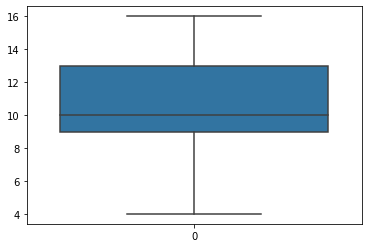

In [53]:
sns.boxplot(data=[salary_train['educationno']])

<AxesSubplot:xlabel='educationno', ylabel='Density'>

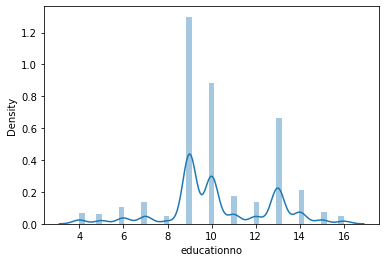

In [54]:
sns.distplot(salary_train['educationno'])

#### When checking outliers for capital loss & capital there are no outliers are detecting so performing with z-score

In [55]:
salary_test['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [56]:
salary_train.capitalloss.min()

0

In [57]:
salary_train.capitalloss.max()

3900

In [58]:
salary_train.capitalloss.describe()

count    29514.000000
mean        88.501254
std        403.810142
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       3900.000000
Name: capitalloss, dtype: float64

In [59]:
salary_train.capitalloss.mean()

88.50125364233922

In [60]:
salary_train.capitalloss.std()

403.81014209149185

In [61]:
#upper_limit = salary_train.capitalloss.mean() + 3*salary_train.capitalloss.std()
#print(upper_limit)

In [62]:
#upper_limit = salary_train.capitalloss.mean() - 3*salary_train.capitalloss.std()
#print(lower_limit)

In [63]:
#salary_train[(salary_train.capitalloss > upper_limit) | (salary_train.capitalloss < upper_limit)]

### when iam performing zscore 90% of the data points are removing, so trying to make feature scaling

In [64]:
salary_train.skew()

age              0.413875
educationno      0.016395
capitalgain     11.845436
capitalloss      4.501577
hoursperweek     0.348448
dtype: float64

In [65]:
salary_test.skew()

age              0.536112
educationno     -0.320999
capitalgain     11.570156
capitalloss      4.496738
hoursperweek     0.359502
dtype: float64

In [66]:
#salary_train['capitalloss'] = np.log(salary_train['capitalloss']+1)

In [67]:
#salary_train['capitalloss'] = np.log(salary_train['capitalgain'])

In [68]:
salary_train.skew()

age              0.413875
educationno      0.016395
capitalgain     11.845436
capitalloss      4.501577
hoursperweek     0.348448
dtype: float64

In [69]:
salary_test['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [70]:
#salary_test['capitalgain'] = np.log(salary_test['capitalgain']+1)

In [71]:
#salary_test['capitalloss'] = np.log(salary_test['capitalloss']+1)

In [72]:
salary_test.skew()

age              0.536112
educationno     -0.320999
capitalgain     11.570156
capitalloss      4.496738
hoursperweek     0.359502
dtype: float64

<AxesSubplot:xlabel='capitalloss', ylabel='Density'>

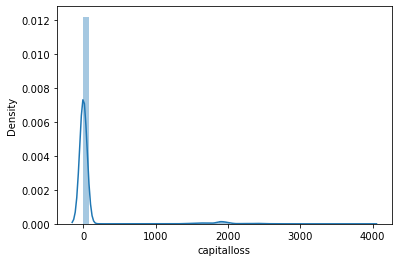

In [73]:
sns.distplot(salary_train['capitalloss'])

<AxesSubplot:xlabel='capitalgain', ylabel='Density'>

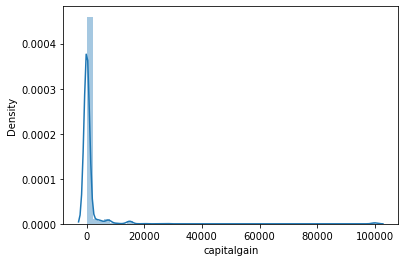

In [74]:
sns.distplot(salary_train['capitalgain'])

In [75]:
salary_train['capitalgain'] = 1/(salary_train['capitalgain']+1) # resciprocal for train

In [76]:
salary_train['capitalgain'] = salary_train['capitalgain']**(1/2) # square for train

In [77]:
salary_train['capitalloss'] = 1/(salary_train['capitalloss']+1) # resciprocal for train

In [78]:
salary_train['capitalloss'] = salary_train['capitalloss']**(1/2) # square for train

In [79]:
salary_test['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [80]:
salary_test['capitalgain'] = 1/(salary_test['capitalgain']+1) # resciprocal for test

In [81]:
salary_test['capitalgain'] = salary_test['capitalgain']**(1/2) # square for test

In [82]:
salary_test['capitalloss'] = 1/(salary_test['capitalloss']+1) # resciprocal for test

In [83]:
salary_test['capitalloss'] = salary_test['capitalloss']**(1/2) # square for test

In [84]:
salary_train.skew()

age             0.413875
educationno     0.016395
capitalgain    -2.987369
capitalloss    -4.254901
hoursperweek    0.348448
dtype: float64

In [85]:
salary_test.skew()

age             0.536112
educationno    -0.320999
capitalgain    -3.020437
capitalloss    -4.263341
hoursperweek    0.359502
dtype: float64

In [86]:
salary_train['age'] = np.log(salary_train['age']+1)

In [87]:
salary_test['age'] = np.log(salary_test['age']+1)

In [88]:
salary_test['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

### Converting object variables into categorical variables

In [89]:
salary_train['workclass']=salary_train['workclass'].astype('category')
salary_train['education']=salary_train['education'].astype('category')
salary_train['native']=salary_train['native'].astype('category')
salary_train['maritalstatus']=salary_train['maritalstatus'].astype('category')
salary_train['occupation']=salary_train['occupation'].astype('category')
salary_train['relationship']=salary_train['relationship'].astype('category')
salary_train['race']=salary_train['race'].astype('category')
salary_train['sex']=salary_train['sex'].astype('category')
salary_train['Salary']=salary_train['Salary'].astype('category')


In [90]:
salary_test['workclass']=salary_test['workclass'].astype('category')
salary_test['education']=salary_test['education'].astype('category')
salary_test['native']=salary_test['native'].astype('category')
salary_test['maritalstatus']=salary_test['maritalstatus'].astype('category')
salary_test['occupation']=salary_test['occupation'].astype('category')
salary_test['relationship']=salary_test['relationship'].astype('category')
salary_test['race']=salary_test['race'].astype('category')
salary_test['sex']=salary_test['sex'].astype('category')
salary_test['Salary']=salary_test['Salary'].astype('category')


In [91]:
salary_test['Salary'].unique()

[' <=50K', ' >50K']
Categories (2, object): [' <=50K', ' >50K']

In [92]:
salary_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [93]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29514 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            29514 non-null  float64 
 1   workclass      29514 non-null  category
 2   education      29514 non-null  category
 3   educationno    29514 non-null  int64   
 4   maritalstatus  29514 non-null  category
 5   occupation     29514 non-null  category
 6   relationship   29514 non-null  category
 7   race           29514 non-null  category
 8   sex            29514 non-null  category
 9   capitalgain    29514 non-null  float64 
 10  capitalloss    29514 non-null  float64 
 11  hoursperweek   29514 non-null  int64   
 12  native         29514 non-null  category
 13  Salary         29514 non-null  category
dtypes: category(9), float64(3), int64(2)
memory usage: 1.6 MB


In [94]:
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            15060 non-null  float64 
 1   workclass      15060 non-null  category
 2   education      15060 non-null  category
 3   educationno    15060 non-null  int64   
 4   maritalstatus  15060 non-null  category
 5   occupation     15060 non-null  category
 6   relationship   15060 non-null  category
 7   race           15060 non-null  category
 8   sex            15060 non-null  category
 9   capitalgain    15060 non-null  float64 
 10  capitalloss    15060 non-null  float64 
 11  hoursperweek   15060 non-null  int64   
 12  native         15060 non-null  category
 13  Salary         15060 non-null  category
dtypes: category(9), float64(3), int64(2)
memory usage: 724.8 KB


In [95]:
salary_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

#### converting all category into numerical variables

In [96]:
label_encoder = LabelEncoder()
salary_train['workclass'] = label_encoder.fit_transform(salary_train['workclass'])
salary_train['education'] = label_encoder.fit_transform(salary_train['education'])
salary_train['native'] = label_encoder.fit_transform(salary_train['native'])
salary_train['maritalstatus'] = label_encoder.fit_transform(salary_train['maritalstatus'])
salary_train['occupation'] = label_encoder.fit_transform(salary_train['occupation'])
salary_train['relationship'] = label_encoder.fit_transform(salary_train['relationship'])
salary_train['race'] = label_encoder.fit_transform(salary_train['race'])
salary_train['sex'] = label_encoder.fit_transform(salary_train['sex'])
salary_train['Salary'] = label_encoder.fit_transform(salary_train['Salary'])  


In [97]:
salary_test['workclass'] = label_encoder.fit_transform(salary_test['workclass'])
salary_test['education'] = label_encoder.fit_transform(salary_test['education'])
salary_test['native'] = label_encoder.fit_transform(salary_test['native'])
salary_test['maritalstatus'] = label_encoder.fit_transform(salary_test['maritalstatus'])
salary_test['occupation'] = label_encoder.fit_transform(salary_test['occupation'])
salary_test['relationship'] = label_encoder.fit_transform(salary_test['relationship'])
salary_test['race'] = label_encoder.fit_transform(salary_test['race'])
salary_test['sex'] = label_encoder.fit_transform(salary_test['sex'])
salary_test['Salary'] = label_encoder.fit_transform(salary_test['Salary'])  


In [98]:
salary_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [99]:
salary_test['Salary'].unique()

array([0, 1])

In [100]:
salary_train.head()

age  workclass  education  educationno  maritalstatus  occupation  \
0  3.688879          5          7           13              4           0   
1  3.931826          4          7           13              2           3   
2  3.663562          2          9            9              0           5   
3  3.988984          2          1            7              2           5   
4  3.367296          2          7           13              2           9   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  \
0             1     4    1     0.021442          1.0            40      37   
1             0     4    1     1.000000          1.0            13      37   
2             1     4    1     1.000000          1.0            40      37   
3             0     2    1     1.000000          1.0            40      37   
4             5     2    0     1.000000          1.0            40       4   

   Salary  
0       0  
1       0  
2       0  
3       0  
4       0

In [101]:
salary_test.head()

age  workclass  education  educationno  maritalstatus  occupation  \
0  3.258097          2          1            7              4           6   
1  3.663562          2         11            9              2           4   
2  3.367296          1          7           12              2          10   
3  3.806662          2         15           10              2           6   
4  3.555348          2          0            6              4           7   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  \
0             3     2    1     1.000000          1.0            40      37   
1             0     4    1     1.000000          1.0            50      37   
2             0     4    1     1.000000          1.0            40      37   
3             0     2    1     0.011404          1.0            40      37   
4             1     4    1     1.000000          1.0            30      37   

   Salary  
0       0  
1       0  
2       1  
3       1  
4       0

### standardizing the data

In [102]:
salary_train.corr()

age  workclass  education  educationno  maritalstatus  \
age            1.000000   0.075086   0.025889     0.107182      -0.348166   
workclass      0.075086   1.000000   0.016112     0.039039      -0.034677   
education      0.025889   0.016112   1.000000     0.289978      -0.034939   
educationno    0.107182   0.039039   0.289978     1.000000      -0.055692   
maritalstatus -0.348166  -0.034677  -0.034939    -0.055692       1.000000   
occupation    -0.011762   0.015147  -0.039888     0.096944       0.022302   
relationship  -0.271319  -0.066356  -0.012099    -0.104561       0.176500   
race           0.020093   0.043601   0.010603     0.032157      -0.069936   
sex            0.100691   0.074662  -0.024968     0.013308      -0.115401   
capitalgain   -0.122127  -0.017086  -0.019022    -0.120184       0.061423   
capitalloss   -0.061422  -0.001876  -0.012374    -0.079557       0.036277   
hoursperweek   0.189686   0.053655   0.052250     0.153808      -0.187294   
native        -0.004330   0.004312   0.042390     0.008167      -0.019678   
Salary         0.286076   0.017139   0.064846     0.338233      -0.192856   

               occupation  relationship      race       sex  capitalgain  \
age             -0.011762     -0.271319  0.020093  0.100691    -0.122127   
workclass        0.015147     -0.066356  0.043601  0.074662    -0.017086   
education       -0.039888     -0.012099  0.010603 -0.024968    -0.019022   
educationno      0.096944     -0.104561  0.032157  0.013308    -0.120184   
maritalstatus    0.022302      0.176500 -0.069936 -0.115401     0.061423   
occupation       1.000000     -0.055634  0.002168  0.064534    -0.012655   
relationship    -0.055634      1.000000 -0.116861 -0.585688     0.078616   
race             0.002168     -0.116861  1.000000  0.088207    -0.023591   
sex              0.064534     -0.585688  0.088207  1.000000    -0.067606   
capitalgain     -0.012655      0.078616 -0.023591 -0.067606     1.000000   
capitalloss     -0.014844      0.057741 -0.022966 -0.042745    -0.067860   
hoursperweek     0.019641     -0.263630  0.048920  0.232445    -0.079779   
native          -0.005096     -0.010639  0.135961  0.002381    -0.008267   
Salary           0.052403     -0.254468  0.072521  0.219576    -0.267508   

               capitalloss  hoursperweek    native    Salary  
age              -0.061422      0.189686 -0.004330  0.286076  
workclass        -0.001876      0.053655  0.004312  0.017139  
education        -0.012374      0.052250  0.042390  0.064846  
educationno      -0.079557      0.153808  0.008167  0.338233  
maritalstatus     0.036277     -0.187294 -0.019678 -0.192856  
occupation       -0.014844      0.019641 -0.005096  0.052403  
relationship      0.057741     -0.263630 -0.010639 -0.254468  
race             -0.022966      0.048920  0.135961  0.072521  
sex              -0.042745      0.232445  0.002381  0.219576  
capitalgain      -0.067860     -0.079779 -0.008267 -0.267508  
capitalloss       1.000000     -0.049032 -0.007019 -0.139029  
hoursperweek     -0.049032      1.000000  0.006724  0.229118  
native           -0.007019      0.006724  1.000000  0.010550  
Salary           -0.139029      0.229118  0.010550  1.000000

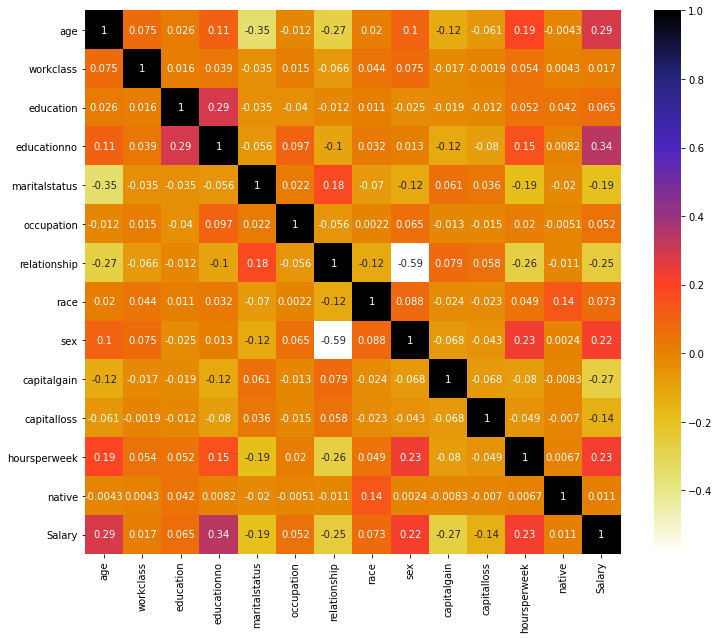

In [103]:
# using pearson Correlation

plt.figure(figsize=(12,10))
cor = salary_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

### data distribution is for 300 data points cos i took only 300 data points to apply model fitting

#### spliting data into X&Y

In [104]:
X_train = salary_train.iloc[0:300,0:13]
y_train = salary_train.iloc[0:300,-1]
X_test = salary_test.iloc[0:300,0:13]
y_test = salary_test.iloc[0:300,-1]


In [105]:
X_train.tail()

age  workclass  education  educationno  maritalstatus  occupation  \
304  4.077537          4          9            9              2           5   
305  4.204693          2          9            9              4          13   
306  3.737670          2         12           10              4           2   
307  3.295837          2          7           13              4           0   
308  3.871201          2          6           11              4           7   

     relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  
304             0     4    1     1.000000          1.0            40      37  
305             1     4    1     0.022081          1.0            55      37  
306             1     2    1     1.000000          1.0            45      37  
307             1     4    1     1.000000          1.0            40      37  
308             1     4    1     1.000000          1.0            40      37

In [106]:
sc = StandardScaler()
X_train_12 = sc.fit_transform(X_train)
sc = StandardScaler()
X_test_12 = sc.fit_transform(X_test)

In [107]:
salary_train_2 = salary_train.copy()
salary_train_2 = salary_train_2.iloc[0:300 ,0:]
salary_train_2.tail()

age  workclass  education  educationno  maritalstatus  occupation  \
304  4.077537          4          9            9              2           5   
305  4.204693          2          9            9              4          13   
306  3.737670          2         12           10              4           2   
307  3.295837          2          7           13              4           0   
308  3.871201          2          6           11              4           7   

     relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  \
304             0     4    1     1.000000          1.0            40      37   
305             1     4    1     0.022081          1.0            55      37   
306             1     2    1     1.000000          1.0            45      37   
307             1     4    1     1.000000          1.0            40      37   
308             1     4    1     1.000000          1.0            40      37   

     Salary  
304       0  
305       0  
306       0  
307       0  
308       0

In [108]:
salary_test_2 = salary_test.iloc[0:300 ,0:]
salary_test_2.tail()

age  workclass  education  educationno  maritalstatus  occupation  \
295  4.043051          3          9           13              2           3   
296  3.637586          2         11            9              2           2   
297  3.970292          2          3            2              2           6   
298  3.295837          2         11            9              5           5   
299  3.526361          2         12           14              2           9   

     relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  \
295             0     4    1          1.0          1.0            40      37   
296             0     4    1          1.0          1.0            40      37   
297             0     4    1          1.0          1.0            40      24   
298             3     4    1          1.0          1.0            40      31   
299             0     4    1          1.0          1.0            50      37   

     Salary  
295       0  
296       0  
297       0  
298       0  
299       0

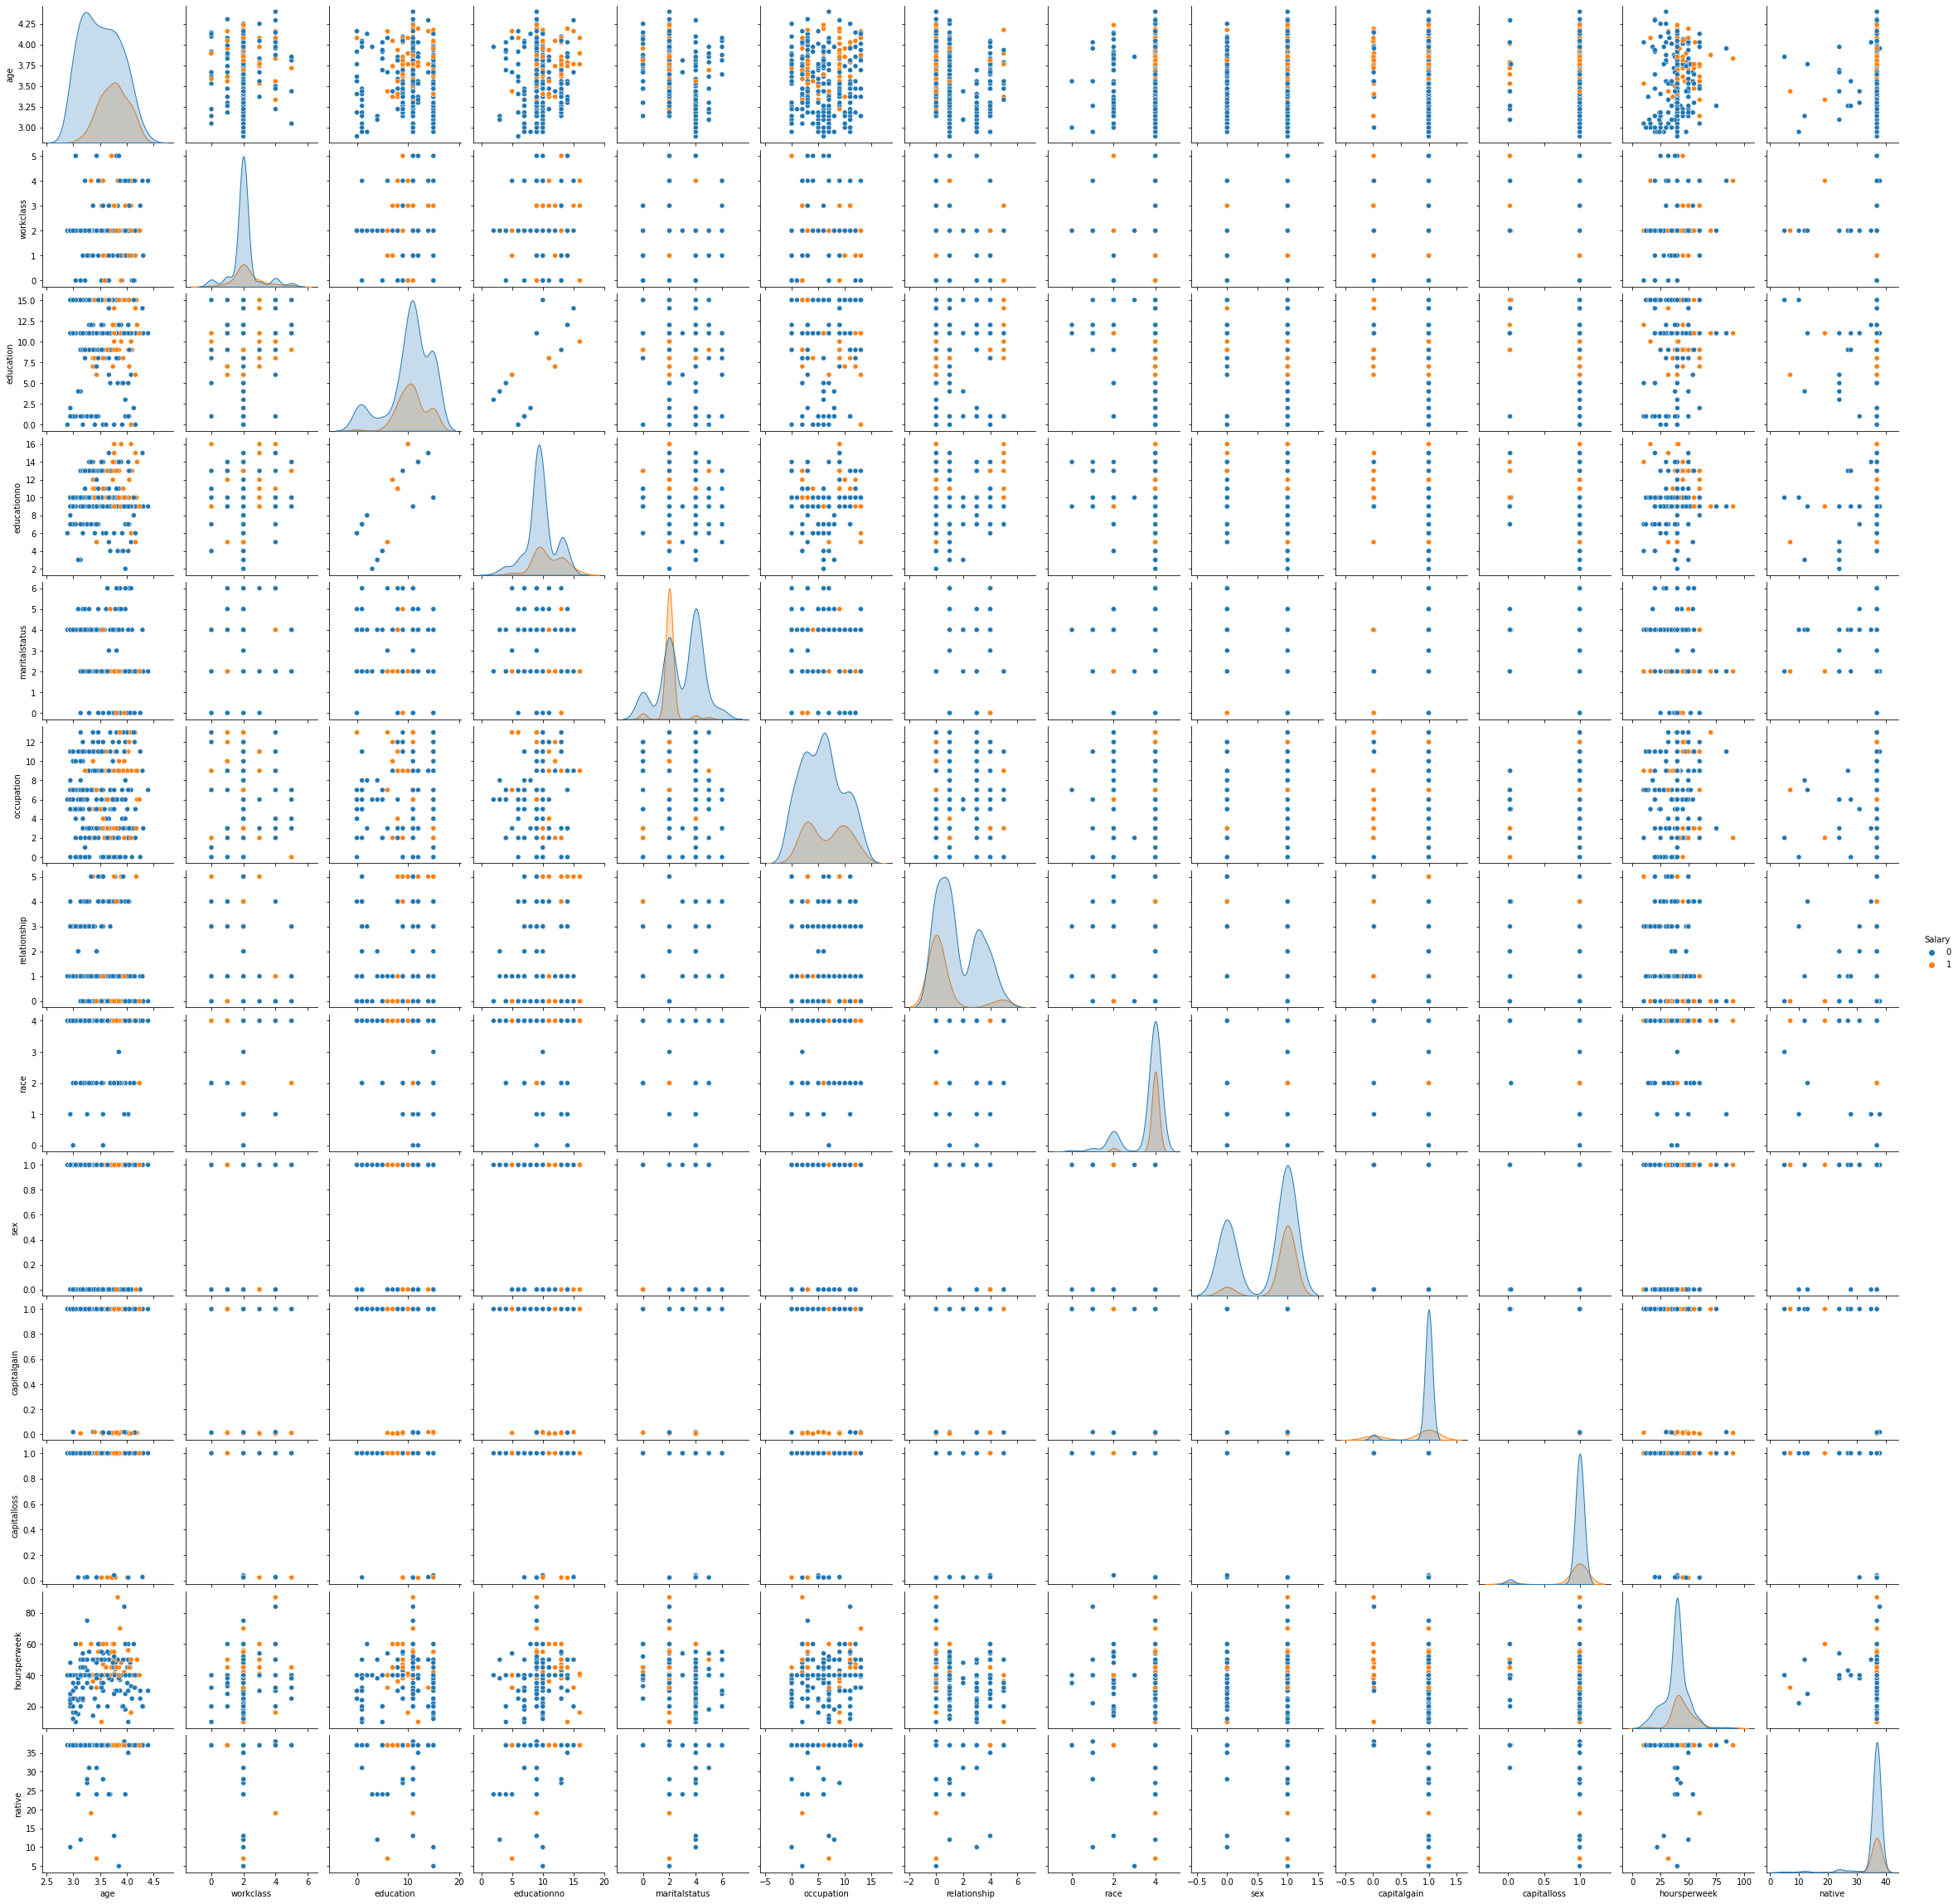

In [109]:
sns.pairplot(salary_test_2,hue='Salary')

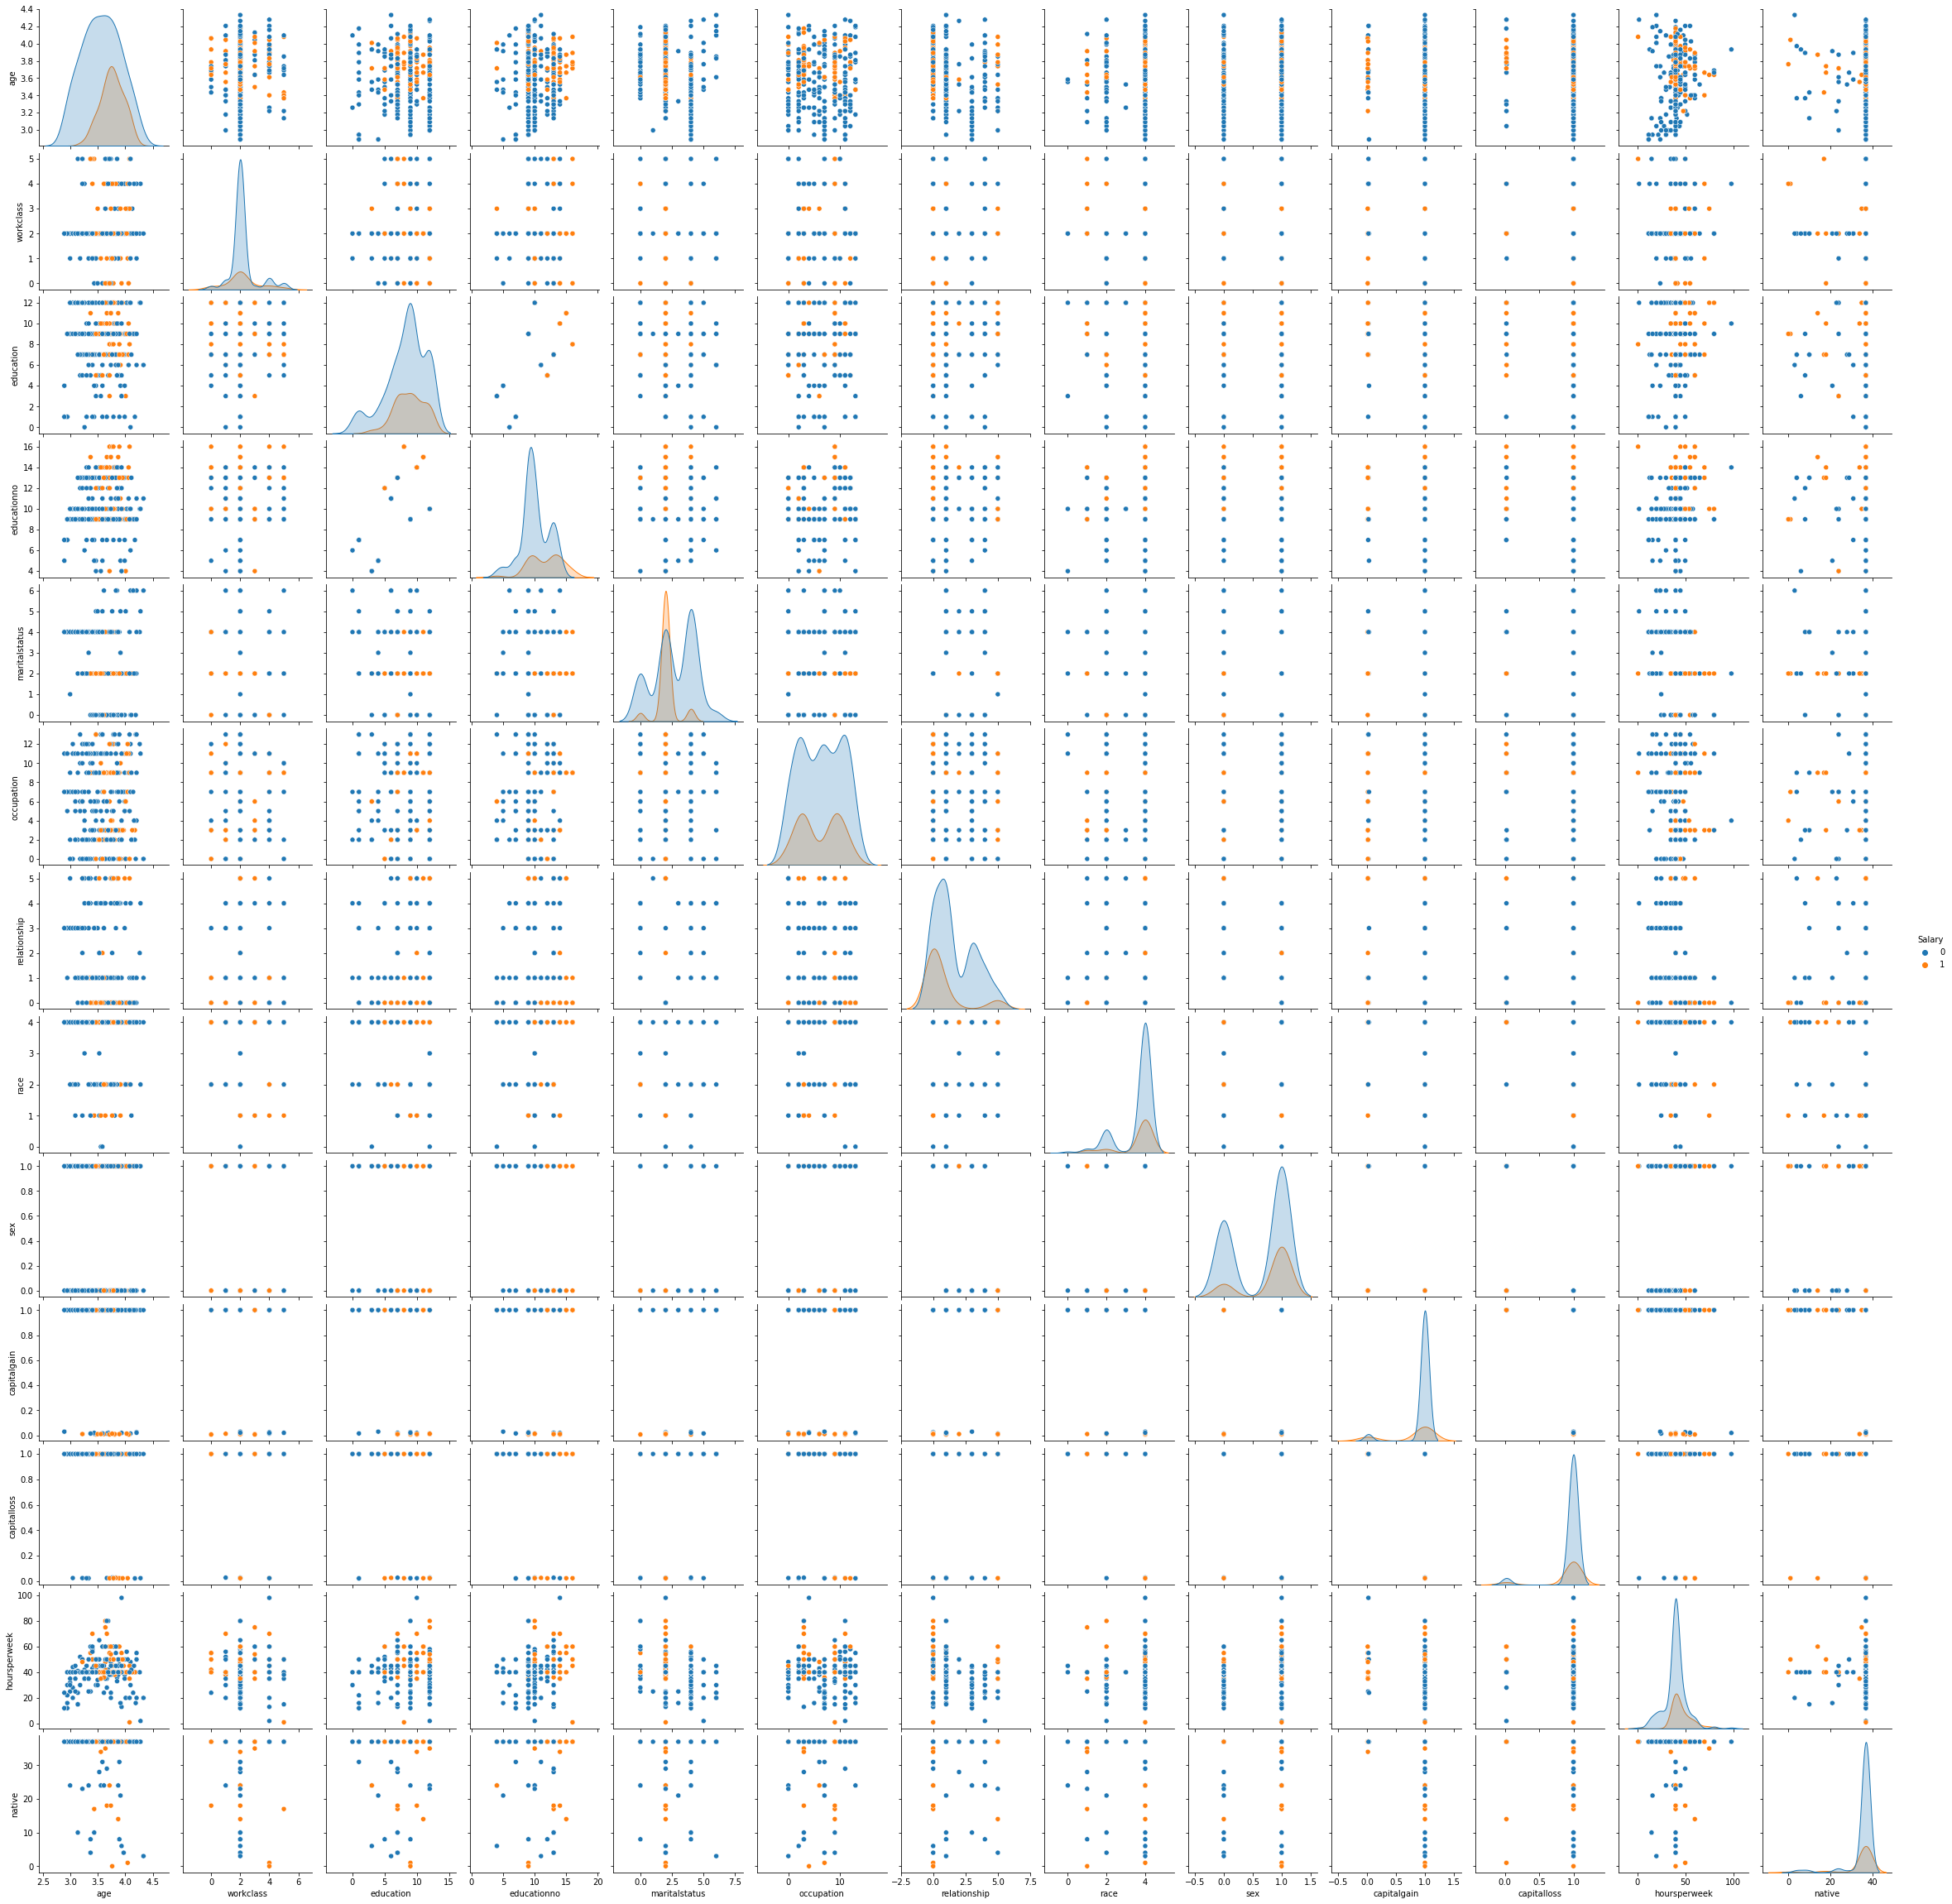

In [110]:
sns.pairplot(salary_train_2,hue='Salary')  ### for 300 data points to data is not linear

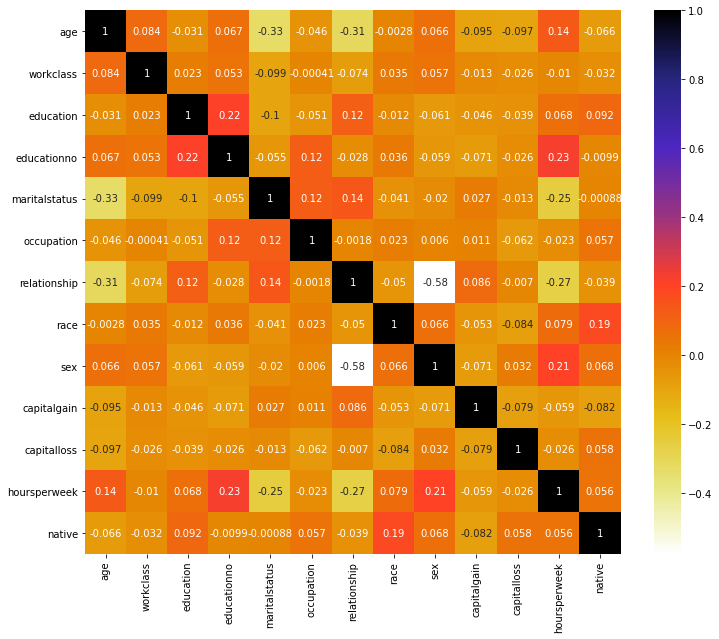

In [111]:
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)      #using Pearson Correlation
plt.show()

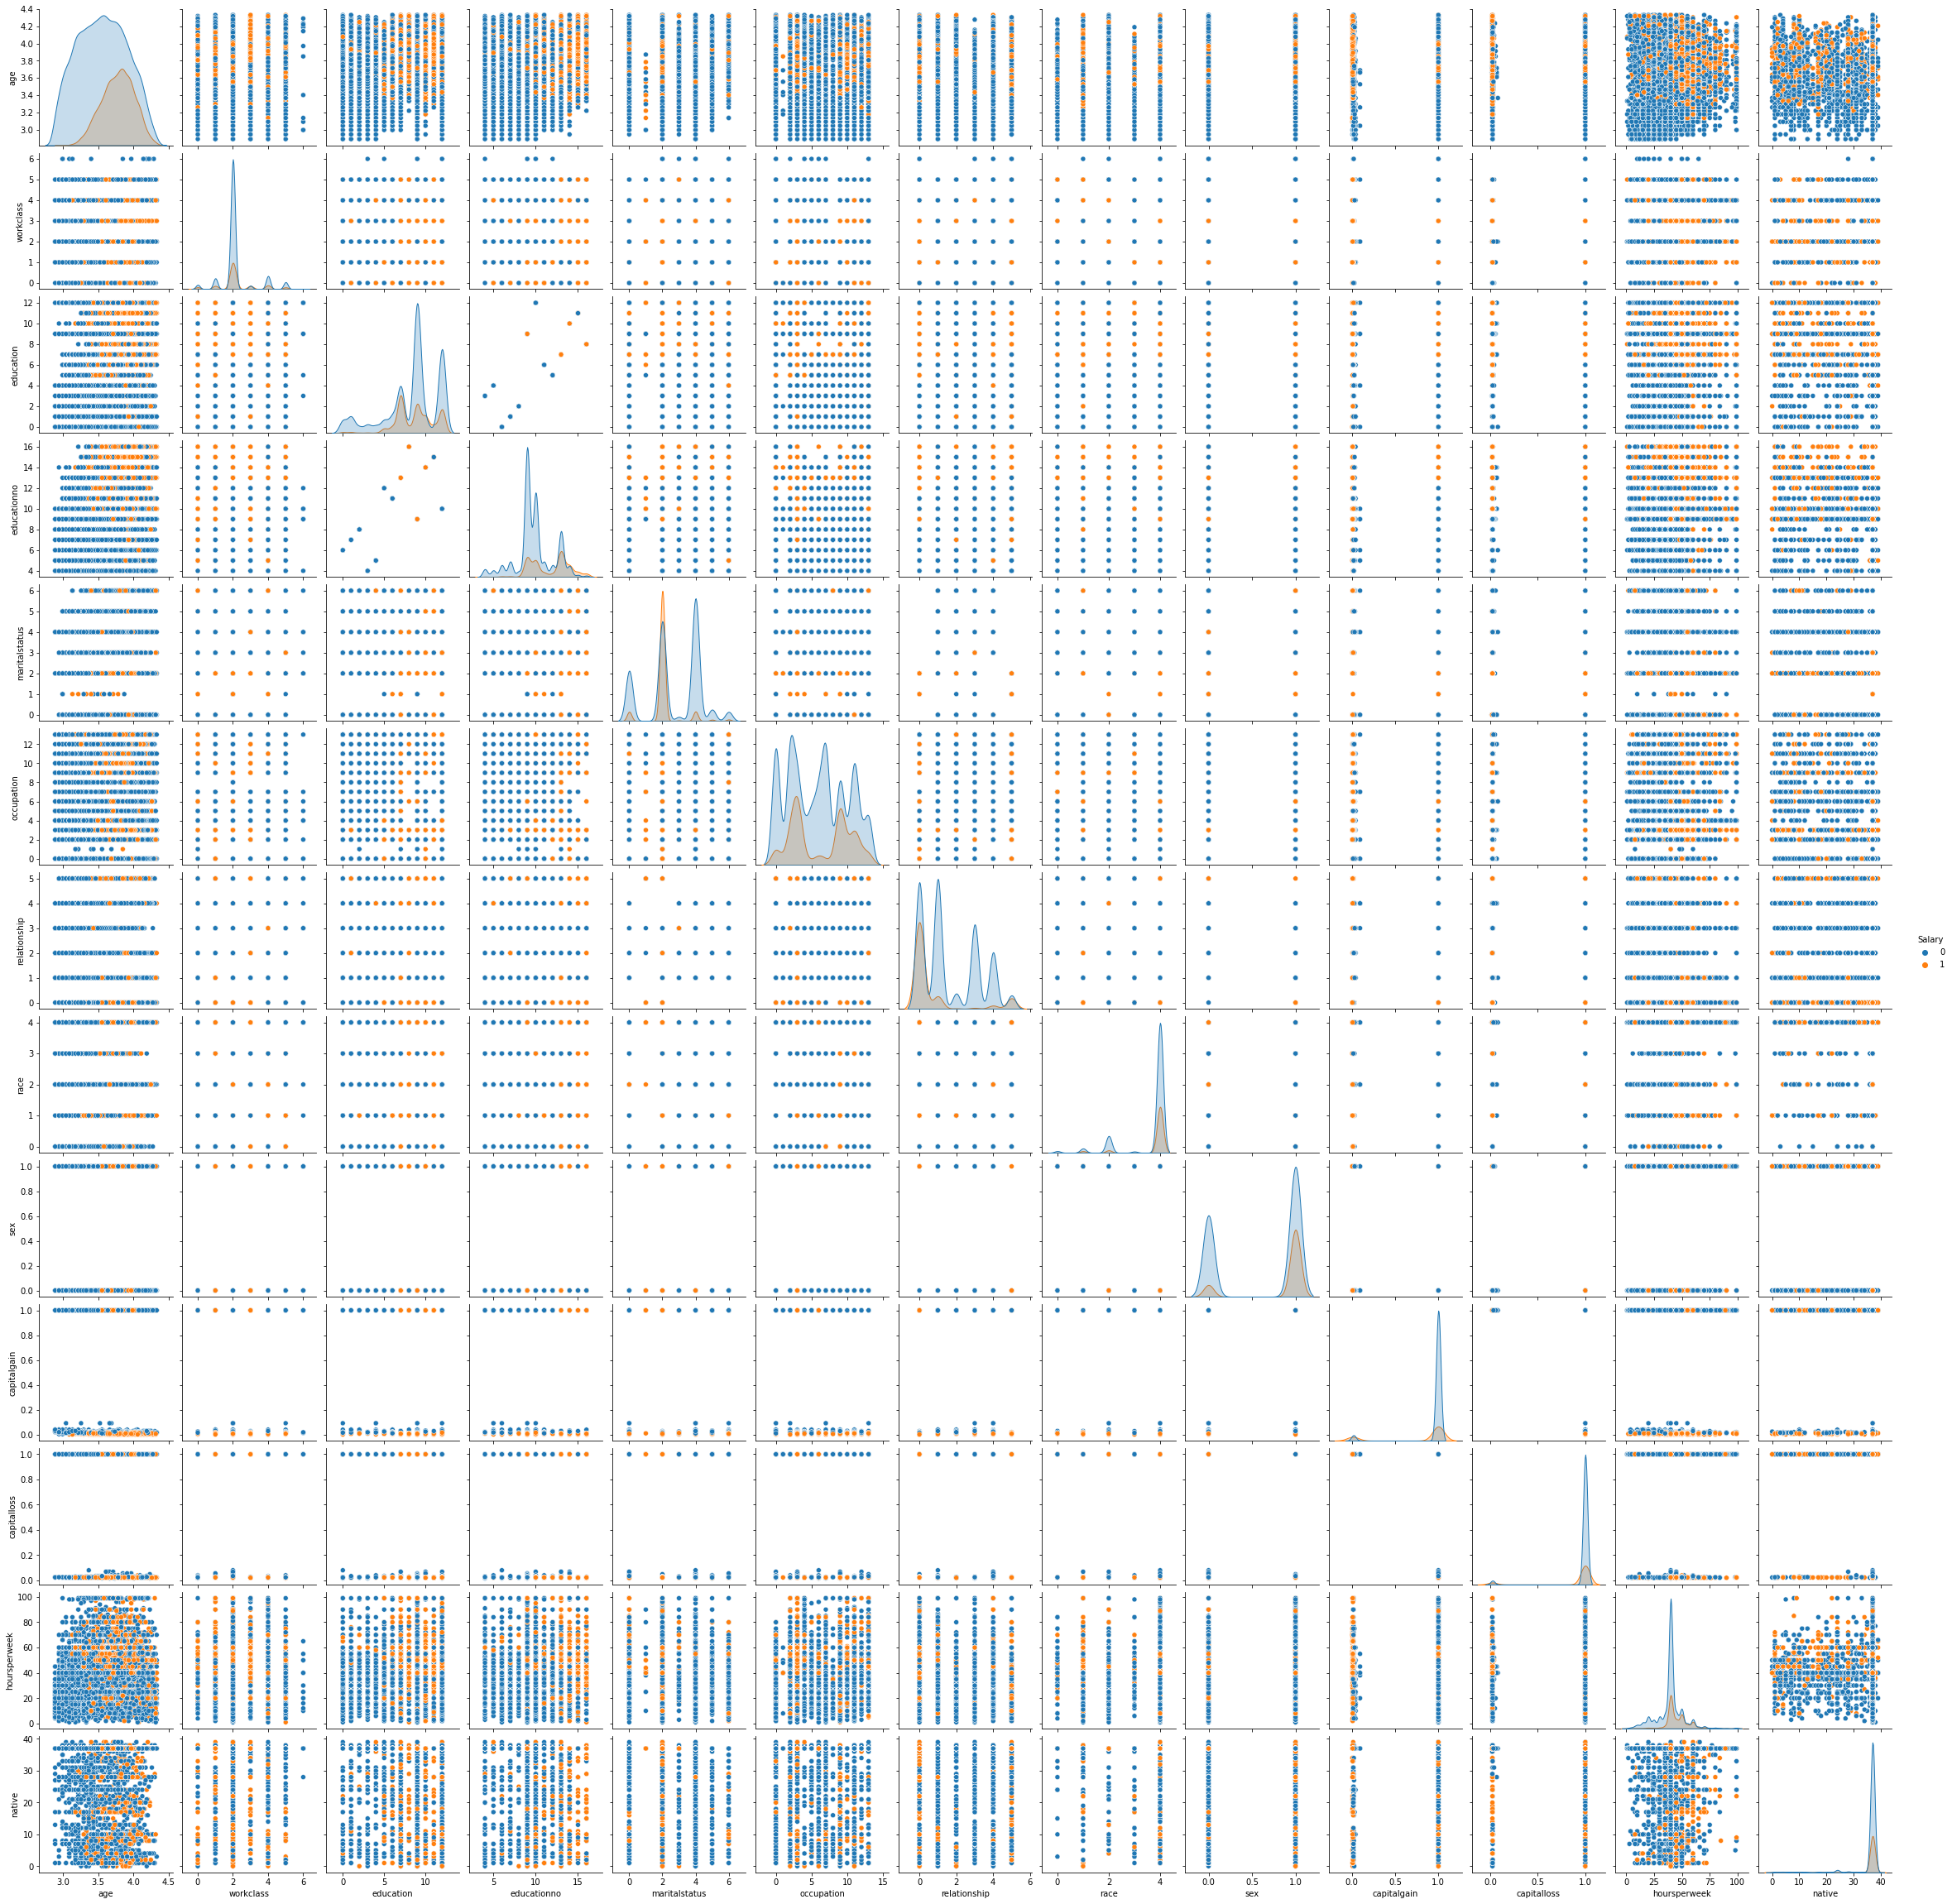

In [112]:
sns.pairplot(salary_train,hue='Salary')  # i can see the data is not linear so, i think it is better with rbf r poly

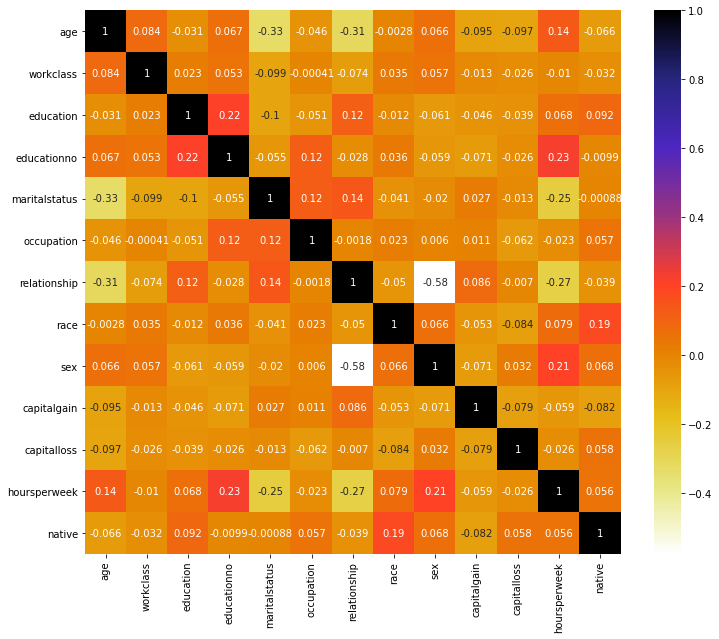

In [113]:
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)      #using Pearson Correlation
plt.show()

In [114]:
X_train.head()

age  workclass  education  educationno  maritalstatus  occupation  \
0  3.688879          5          7           13              4           0   
1  3.931826          4          7           13              2           3   
2  3.663562          2          9            9              0           5   
3  3.988984          2          1            7              2           5   
4  3.367296          2          7           13              2           9   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  
0             1     4    1     0.021442          1.0            40      37  
1             0     4    1     1.000000          1.0            13      37  
2             1     4    1     1.000000          1.0            40      37  
3             0     2    1     1.000000          1.0            40      37  
4             5     2    0     1.000000          1.0            40       4

#### model fitting

In [115]:
### as per heat map i can see the data is not linear with other , most of the points are mergre up

In [116]:
model_linear = SVC(kernel = 'linear')
model_linear.fit(X_train,y_train)

SVC(kernel='linear')

### Checking accuracy for training data

In [117]:
y_pred = model_linear.predict(X_train)
y_pred_df_train = pd.DataFrame({'actual': y_train,'predicted_prob': model_linear.predict(X_train)})

In [118]:
y_pred_df_train

actual  predicted_prob
0         0               1
1         0               0
2         0               0
3         0               0
4         0               0
..      ...             ...
304       0               0
305       0               1
306       0               0
307       0               0
308       0               0

[300 rows x 2 columns]

In [119]:
accuracy_score(y_train,model_linear.predict(X_train))

0.81

In [120]:
precision_score(y_train,model_linear.predict(X_train))

0.7

In [121]:
confusion_matrix(y_train,model_linear.predict(X_train))

array([[215,  12],
       [ 45,  28]], dtype=int64)

In [122]:
(215+28)/(215+12+45+28)

0.81

#### for training data the accuracy score is 0.81

#### checking with the test data set

In [123]:
model_linear_pred_test = model_linear.predict(X_test)

In [124]:
model_linear_pred_test

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [125]:
model_linear_pred_test_df = pd.DataFrame({'actual' : y_test , 'predicted_test' : model_linear.predict(X_test)})

In [126]:
model_linear_pred_test_df

actual  predicted_test
0         0               0
1         0               0
2         1               0
3         1               1
4         0               0
..      ...             ...
295       0               0
296       0               0
297       0               0
298       0               0
299       0               1

[300 rows x 2 columns]

In [127]:
salary_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [128]:
salary_test['Salary'].unique()

array([0, 1])

In [129]:
precision_score(y_test, model_linear.predict(X_test))

0.627906976744186

In [130]:
confusion_matrix(y_test,model_linear.predict(X_test))

array([[212,  16],
       [ 45,  27]], dtype=int64)

In [131]:
accuracy_score(y_test , model_linear.predict(X_test))

0.7966666666666666

#### Conducting with poly

In [132]:
model_poly = SVC(kernel='poly')
model_poly.fit(X_train,y_train)

SVC(kernel='poly')

In [133]:
model_poly_train = model_poly.predict(X_train)

In [134]:
model_poly_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [135]:
confusion_matrix(y_train , model_poly.predict(X_train))

array([[226,   1],
       [ 73,   0]], dtype=int64)

In [136]:
accuracy_score(y_train, model_poly.predict(X_train))

0.7533333333333333

In [137]:
precision_score(y_train , model_poly.predict(X_train))

0.0

### checking for test data set

In [138]:
model_poly_test_pred = model_poly.predict(X_test)

In [139]:
model_poly_test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [140]:
confusion_matrix(y_test,model_poly.predict(X_test))

array([[228,   0],
       [ 72,   0]], dtype=int64)

In [141]:
accuracy_score(y_test,model_poly.predict(X_test))

0.76

In [142]:
precision_score(y_test,model_poly.predict(X_test))

0.0

### Checking with rbf

In [143]:
model_rbf_1 = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[0.1,0.01,0.02,0.002,10,20],'C':[1.0] }]
model_rbf = GridSearchCV(model_rbf_1,param_grid,cv=10)
model_rbf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1.0], 'gamma': [0.1, 0.01, 0.02, 0.002, 10, 20],
                          'kernel': ['rbf']}])

In [144]:
model_rbf.best_score_, model_rbf.best_params_

(0.77, {'C': 1.0, 'gamma': 0.01, 'kernel': 'rbf'})

In [145]:
model_rbf_1 = SVC(C=1.0 ,gamma = 0.01)
model_rbf_1.fit(X_train,y_train)

SVC(gamma=0.01)

In [146]:
model_rbf_train=model_rbf_1.predict(X_train)

In [147]:
model_rbf_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [148]:
confusion_matrix(y_train,model_rbf_1.predict(X_train))

array([[225,   2],
       [ 56,  17]], dtype=int64)

In [149]:
accuracy_score(y_train,model_rbf_1.predict(X_train))

0.8066666666666666

In [150]:
precision_score(y_train,model_rbf_1.predict(X_train))

0.8947368421052632

#### model testing

In [151]:
model_rbf_test_pred = model_rbf_1.predict(X_test)

In [152]:
model_rbf_test_pred


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [153]:
confusion_matrix(y_test,model_rbf_1.predict(X_test))

array([[226,   2],
       [ 70,   2]], dtype=int64)

In [154]:
accuracy_score(y_test,model_rbf_1.predict(X_test))

0.76

In [155]:
precision_score(y_test,model_rbf_1.predict(X_test))

0.5

In [156]:
forest_fires = pd.read_csv("C:\\Users\\sunee\\Desktop\\data science total\\assignments\\assignment 17 on Support Vector Machines\\forestfires.csv")

In [157]:
forest_fires

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0           0         0         0         1         0         0         0   
1           0         0         0         0         0         0         1   
2           0         0         0         0         0         0         1   
3           0         0         0         1         0         0         0   
4           0         0         0         1         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         1         0   

     monthsep  size_category  
0           0          small  
1           0          small  
2           0          small  
3           0          small  
4           0          small  
..        ...            ...  
512         0          large  
513         0          large  
514         0          large  
515         0          small  
516         0          small  

[517 rows x 31 columns]

In [158]:
forest_fires.head()

month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0          small  
1         0          small  
2         0          small  
3         0          small  
4         0          small  

[5 rows x 31 columns]

In [159]:
forest_fires.tail()

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         1         0   

     monthsep  size_category  
512         0          large  
513         0          large  
514         0          large  
515         0          small  
516         0          small  

[5 rows x 31 columns]

In [160]:
forest_fires.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [161]:
forest_fires.describe(include = 'all')

month  day        FFMC         DMC          DC         ISI        temp  \
count    517  517  517.000000  517.000000  517.000000  517.000000  517.000000   
unique    12    7         NaN         NaN         NaN         NaN         NaN   
top      aug  sun         NaN         NaN         NaN         NaN         NaN   
freq     184   95         NaN         NaN         NaN         NaN         NaN   
mean     NaN  NaN   90.644681  110.872340  547.940039    9.021663   18.889168   
std      NaN  NaN    5.520111   64.046482  248.066192    4.559477    5.806625   
min      NaN  NaN   18.700000    1.100000    7.900000    0.000000    2.200000   
25%      NaN  NaN   90.200000   68.600000  437.700000    6.500000   15.500000   
50%      NaN  NaN   91.600000  108.300000  664.200000    8.400000   19.300000   
75%      NaN  NaN   92.900000  142.400000  713.900000   10.800000   22.800000   
max      NaN  NaN   96.200000  291.300000  860.600000   56.100000   33.300000   

                RH        wind        rain  ...    monthfeb    monthjan  \
count   517.000000  517.000000  517.000000  ...  517.000000  517.000000   
unique         NaN         NaN         NaN  ...         NaN         NaN   
top            NaN         NaN         NaN  ...         NaN         NaN   
freq           NaN         NaN         NaN  ...         NaN         NaN   
mean     44.288201    4.017602    0.021663  ...    0.038685    0.003868   
std      16.317469    1.791653    0.295959  ...    0.193029    0.062137   
min      15.000000    0.400000    0.000000  ...    0.000000    0.000000   
25%      33.000000    2.700000    0.000000  ...    0.000000    0.000000   
50%      42.000000    4.000000    0.000000  ...    0.000000    0.000000   
75%      53.000000    4.900000    0.000000  ...    0.000000    0.000000   
max     100.000000    9.400000    6.400000  ...    1.000000    1.000000   

          monthjul    monthjun    monthmar    monthmay    monthnov  \
count   517.000000  517.000000  517.000000  517.000000  517.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      0.061896    0.032882    0.104449    0.003868    0.001934   
std       0.241199    0.178500    0.306138    0.062137    0.043980   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%       0.000000    0.000000    0.000000    0.000000    0.000000   
50%       0.000000    0.000000    0.000000    0.000000    0.000000   
75%       0.000000    0.000000    0.000000    0.000000    0.000000   
max       1.000000    1.000000    1.000000    1.000000    1.000000   

          monthoct    monthsep  size_category  
count   517.000000  517.000000            517  
unique         NaN         NaN              2  
top            NaN         NaN          small  
freq           NaN         NaN            378  
mean      0.029014    0.332689            NaN  
std       0.168007    0.471632            NaN  
min       0.000000    0.000000            NaN  
25%       0.000000    0.000000            NaN  
50%       0.000000    0.000000            NaN  
75%       0.000000    1.000000            NaN  
max       1.000000    1.000000            NaN  

[11 rows x 31 columns]

In [162]:
forest_fires['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [163]:
forest_fires['size_category'].unique()

array(['small', 'large'], dtype=object)

In [164]:
forest_fires['day'].unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [165]:
forest_fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [166]:
forest_fires.select_dtypes(include=['object']).dtypes

month            object
day              object
size_category    object
dtype: object

In [167]:
forest_fires.select_dtypes(include=['int64']).dtypes

RH          int64
dayfri      int64
daymon      int64
daysat      int64
daysun      int64
daythu      int64
daytue      int64
daywed      int64
monthapr    int64
monthaug    int64
monthdec    int64
monthfeb    int64
monthjan    int64
monthjul    int64
monthjun    int64
monthmar    int64
monthmay    int64
monthnov    int64
monthoct    int64
monthsep    int64
dtype: object

In [168]:
forest_fires.select_dtypes(include=['float']).dtypes

FFMC    float64
DMC     float64
DC      float64
ISI     float64
temp    float64
wind    float64
rain    float64
area    float64
dtype: object

In [169]:
forest_fires.skew()

FFMC        -6.575606
DMC          0.547498
DC          -1.100445
ISI          2.536325
temp        -0.331172
RH           0.862904
wind         0.571001
rain        19.816344
area        12.846934
dayfri       1.816105
daymon       2.043956
daysat       1.835290
daysun       1.637920
daythu       2.375268
daytue       2.291255
daywed       2.594172
monthapr     7.401340
monthaug     0.603696
monthdec     7.401340
monthfeb     4.798308
monthjan    16.031038
monthjul     3.646828
monthjun     5.254127
monthmar     2.594172
monthmay    16.031038
monthnov    22.737634
monthoct     5.628522
monthsep     0.712255
dtype: float64

In [170]:
forest_fires.kurtosis()

FFMC         67.066041
DMC           0.204822
DC           -0.245244
ISI          21.458037
temp          0.136166
RH            0.438183
wind          0.054324
rain        421.295964
area        194.140721
dayfri        1.303265
daymon        2.186198
daysat        1.373589
daysun        0.685418
daythu        3.656027
daytue        3.262455
daywed        4.748083
monthapr     52.984784
monthaug     -1.641918
monthdec     52.984784
monthfeb     21.105386
monthjan    255.984443
monthjul     11.343218
monthjun     25.705276
monthmar      4.748083
monthmay    255.984443
monthnov    517.000000
monthoct     29.795509
monthsep     -1.498505
dtype: float64

<AxesSubplot:xlabel='RH', ylabel='Density'>

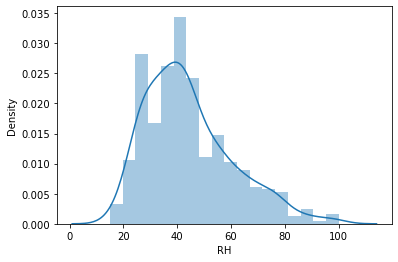

In [171]:
sns.distplot(forest_fires['RH'])

<AxesSubplot:xlabel='FFMC', ylabel='Density'>

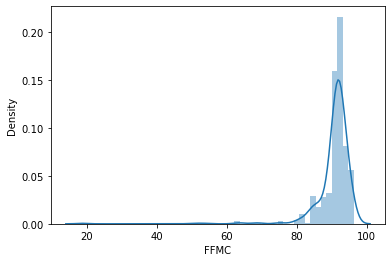

In [172]:
sns.distplot(forest_fires['FFMC'])

<AxesSubplot:xlabel='DMC', ylabel='Density'>

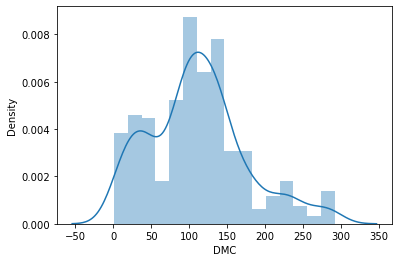

In [173]:
sns.distplot(forest_fires['DMC'])

<AxesSubplot:xlabel='DC', ylabel='Density'>

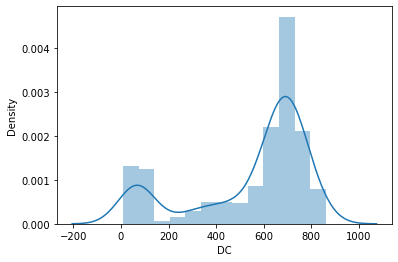

In [174]:
sns.distplot(forest_fires['DC'])

<AxesSubplot:xlabel='ISI', ylabel='Density'>

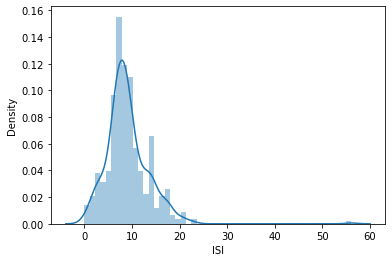

In [175]:
sns.distplot(forest_fires['ISI'])

<AxesSubplot:xlabel='temp', ylabel='Density'>

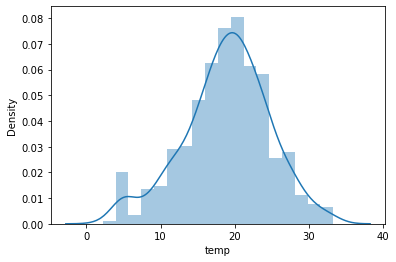

In [176]:
sns.distplot(forest_fires['temp'])

<AxesSubplot:xlabel='wind', ylabel='Density'>

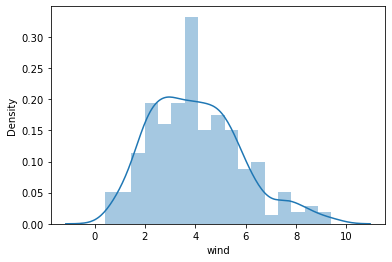

In [177]:
sns.distplot(forest_fires['wind'])

<AxesSubplot:xlabel='rain', ylabel='Density'>

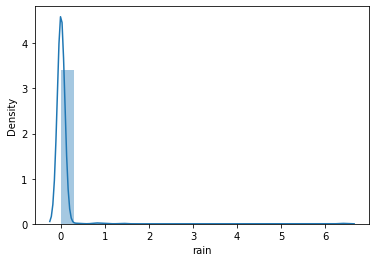

In [178]:
sns.distplot(forest_fires['rain'])

<AxesSubplot:xlabel='area', ylabel='Density'>

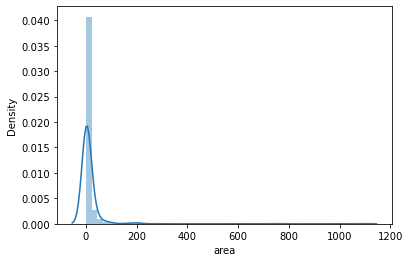

In [179]:
sns.distplot(forest_fires['area'])

<AxesSubplot:>

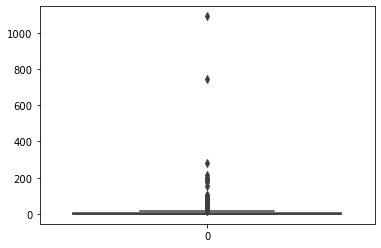

In [180]:
sns.boxplot(data=[forest_fires['area']])

<AxesSubplot:>

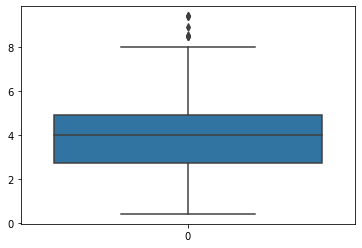

In [181]:
sns.boxplot(data=[forest_fires['wind']])

<AxesSubplot:>

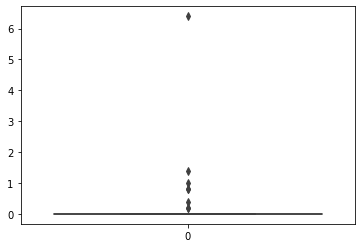

In [182]:
sns.boxplot(data=[forest_fires['rain']])

<AxesSubplot:>

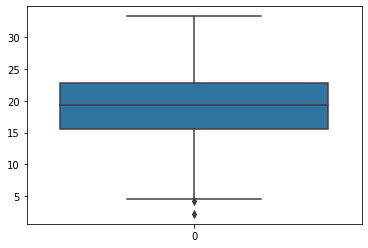

In [183]:
sns.boxplot(data=[forest_fires['temp']])

<AxesSubplot:>

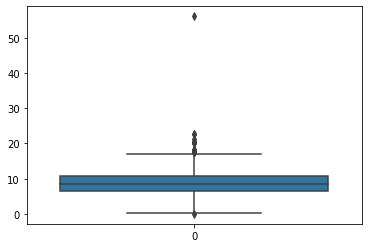

In [184]:
sns.boxplot(data=[forest_fires['ISI']])

<AxesSubplot:>

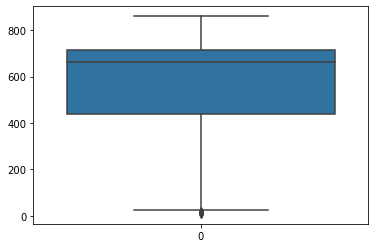

In [185]:
sns.boxplot(data=[forest_fires['DC']])

<AxesSubplot:>

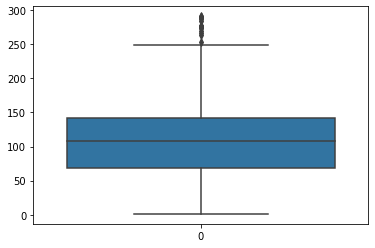

In [186]:
sns.boxplot(data=[forest_fires['DMC']])

<AxesSubplot:>

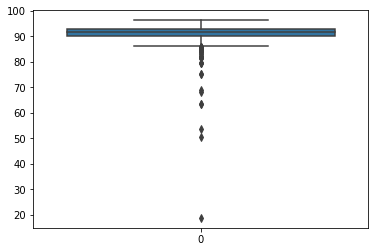

In [187]:
sns.boxplot(data=[forest_fires['FFMC']])

<AxesSubplot:>

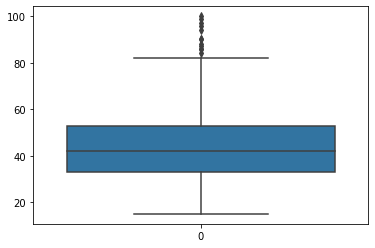

In [188]:
sns.boxplot(data=[forest_fires['RH']])

#### when i am trying to remove the outliers , total got removing , so trying to make data normalization¶

In [189]:
forest_fires.skew()

FFMC        -6.575606
DMC          0.547498
DC          -1.100445
ISI          2.536325
temp        -0.331172
RH           0.862904
wind         0.571001
rain        19.816344
area        12.846934
dayfri       1.816105
daymon       2.043956
daysat       1.835290
daysun       1.637920
daythu       2.375268
daytue       2.291255
daywed       2.594172
monthapr     7.401340
monthaug     0.603696
monthdec     7.401340
monthfeb     4.798308
monthjan    16.031038
monthjul     3.646828
monthjun     5.254127
monthmar     2.594172
monthmay    16.031038
monthnov    22.737634
monthoct     5.628522
monthsep     0.712255
dtype: float64

In [190]:
forest_fires['rain'] = np.log(forest_fires['rain']+1)

In [191]:
forest_fires['area'] = np.log(forest_fires['area']+1)

In [192]:
forest_fires['ISI'] = np.log(forest_fires['ISI']+1)

### Converting categorical data binary or one hot coding

In [193]:
forest_fires['month'] = label_encoder.fit_transform(forest_fires['month'])

In [194]:
forest_fires['day'] = label_encoder.fit_transform(forest_fires['day'])

In [195]:
forest_fires['size_category'] = label_encoder.fit_transform(forest_fires['size_category'])

In [196]:
forest_fires['month'].unique()

array([ 7, 10,  1, 11,  0,  6,  5,  3,  4,  2,  8,  9])

In [197]:
forest_fires['day'].unique()

array([0, 5, 2, 3, 1, 6, 4])

In [198]:
forest_fires['size_category'].unique()

array([1, 0])

### standarzing the data

#### splitting the data into train test and split

In [199]:
X1 = forest_fires.iloc[0: , 0:30]

In [200]:
forest_fires.shape

(517, 31)

In [201]:
X1

month  day  FFMC    DMC     DC       ISI  temp  RH  wind      rain  ...  \
0        7    0  86.2   26.2   94.3  1.808289   8.2  51   6.7  0.000000  ...   
1       10    5  90.6   35.4  669.1  2.041220  18.0  33   0.9  0.000000  ...   
2       10    2  90.6   43.7  686.9  2.041220  14.6  33   1.3  0.000000  ...   
3        7    0  91.7   33.3   77.5  2.302585   8.3  97   4.0  0.182322  ...   
4        7    3  89.3   51.3  102.2  2.360854  11.4  99   1.8  0.000000  ...   
..     ...  ...   ...    ...    ...       ...   ...  ..   ...       ...  ...   
512      1    3  81.6   56.7  665.6  1.064711  27.8  32   2.7  0.000000  ...   
513      1    3  81.6   56.7  665.6  1.064711  21.9  71   5.8  0.000000  ...   
514      1    3  81.6   56.7  665.6  1.064711  21.2  70   6.7  0.000000  ...   
515      1    2  94.4  146.0  614.7  2.509599  25.6  42   4.0  0.000000  ...   
516      9    5  79.5    3.0  106.7  0.741937  11.8  31   4.5  0.000000  ...   

     monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  \
0           0         0         0         0         0         1         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         0         1         0   
4           0         0         0         0         0         1         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         0         0   

     monthnov  monthoct  monthsep  
0           0         0         0  
1           0         1         0  
2           0         1         0  
3           0         0         0  
4           0         0         0  
..        ...       ...       ...  
512         0         0         0  
513         0         0         0  
514         0         0         0  
515         0         0         0  
516         1         0         0  

[517 rows x 30 columns]

In [202]:
Y1 = forest_fires.iloc[0: , 30]

In [203]:
Y1

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

### standardizing the data

In [204]:
sd = StandardScaler()
X = sd.fit_transform(X1)

In [205]:
X

array([[ 2.84222252e-01, -1.42312073e+00, -8.05959472e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 9.70871338e-01,  1.17671466e+00, -8.10203395e-03, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       [ 9.70871338e-01, -3.83186570e-01, -8.10203395e-03, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       ...,
       [-1.08907592e+00,  1.36780508e-01, -1.64008316e+00, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-1.08907592e+00, -3.83186570e-01,  6.80956663e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 7.41988309e-01,  1.17671466e+00, -2.02087875e+00, ...,
         2.27156334e+01, -1.72859706e-01, -7.06081245e-01]])

In [206]:
from sklearn.model_selection import train_test_split

In [207]:
X_train , X_test ,y_train,y_test = train_test_split(X,Y1,random_state=0 , test_size= 0.30)

In [208]:
X_train

array([[-0.63130986, -0.90315365, -1.07795633, ..., -0.04402255,
        -0.17285971, -0.70608125],
       [-1.08907592,  0.13678051,  0.30016107, ..., -0.04402255,
        -0.17285971, -0.70608125],
       [-1.08907592,  1.69668174,  0.88042102, ..., -0.04402255,
        -0.17285971, -0.70608125],
       ...,
       [ 1.19975437, -0.38318657,  0.33642731, ..., -0.04402255,
        -0.17285971,  1.41626761],
       [ 1.19975437, -1.42312073,  0.33642731, ..., -0.04402255,
        -0.17285971,  1.41626761],
       [-1.08907592,  1.17671466,  0.75348916, ..., -0.04402255,
        -0.17285971, -0.70608125]])

In [209]:
y_train

390    0
5      1
141    1
268    1
135    1
      ..
70     1
277    0
9      1
359    0
192    0
Name: size_category, Length: 361, dtype: int32

In [210]:
X_test

array([[ 0.28422225, -0.90315365, -0.55209574, ..., -0.04402255,
        -0.17285971, -0.70608125],
       [-0.17354381, -0.38318657,  0.02816421, ..., -0.04402255,
        -0.17285971, -0.70608125],
       [ 1.19975437, -0.90315365,  0.15509608, ..., -0.04402255,
        -0.17285971,  1.41626761],
       ...,
       [ 0.28422225,  0.13678051, -0.24383264, ..., -0.04402255,
        -0.17285971, -0.70608125],
       [ 1.19975437, -0.38318657,  0.10069671, ..., -0.04402255,
        -0.17285971,  1.41626761],
       [-1.31795895,  0.65674759, -1.65821628, ..., -0.04402255,
        -0.17285971, -0.70608125]])

In [211]:
y_test

213    0
435    1
343    1
230    0
171    1
      ..
26     1
208    0
4      1
331    0
196    0
Name: size_category, Length: 156, dtype: int32

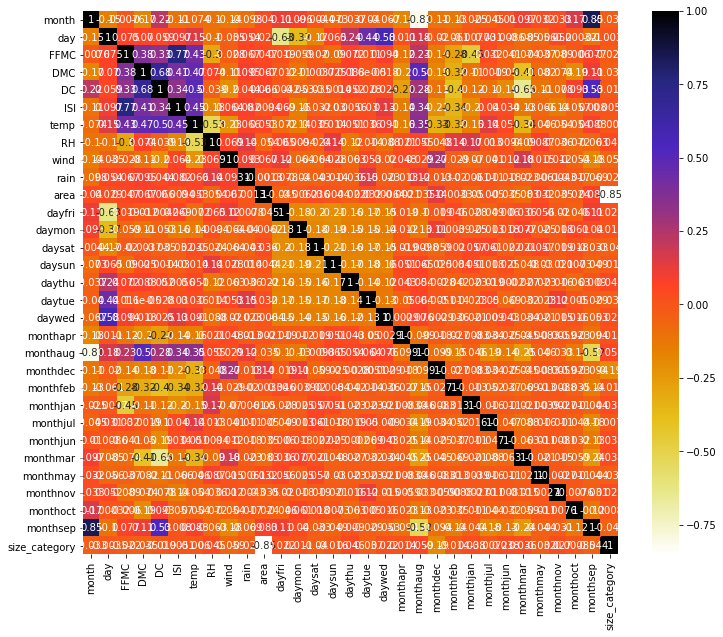

In [212]:
plt.figure(figsize = (12,10))
cor = forest_fires.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [213]:
X_train

array([[-0.63130986, -0.90315365, -1.07795633, ..., -0.04402255,
        -0.17285971, -0.70608125],
       [-1.08907592,  0.13678051,  0.30016107, ..., -0.04402255,
        -0.17285971, -0.70608125],
       [-1.08907592,  1.69668174,  0.88042102, ..., -0.04402255,
        -0.17285971, -0.70608125],
       ...,
       [ 1.19975437, -0.38318657,  0.33642731, ..., -0.04402255,
        -0.17285971,  1.41626761],
       [ 1.19975437, -1.42312073,  0.33642731, ..., -0.04402255,
        -0.17285971,  1.41626761],
       [-1.08907592,  1.17671466,  0.75348916, ..., -0.04402255,
        -0.17285971, -0.70608125]])

#### Fitting into model

In [214]:
model_linear_ff = SVC(kernel='linear')
model_linear_ff.fit(X_train,y_train)

SVC(kernel='linear')

In [215]:
y_pred_lin_train = model_linear_ff.predict(X_train)

In [216]:
y_pred_lin_test = model_linear_ff.predict(X_test)

In [217]:
accuracy_score(y_train,model_linear_ff.predict(X_train))

0.9944598337950139

In [218]:
confusion_matrix(y_train,model_linear_ff.predict(X_train))

array([[ 92,   1],
       [  1, 267]], dtype=int64)

In [219]:
accuracy_score(y_test,model_linear_ff.predict(X_test))

0.9615384615384616

In [220]:
confusion_matrix(y_test,model_linear_ff.predict(X_test))

array([[ 44,   2],
       [  4, 106]], dtype=int64)

### on the testing data the accuracy score is 0.96

In [221]:
model_ploy_ff = SVC(kernel='poly')
model_ploy_ff.fit(X_train,y_train)

SVC(kernel='poly')

In [222]:
y_pred_ff_poly_train = model_ploy_ff.predict(X_train)

In [223]:
y_pred_ff_poly_train

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,

In [224]:
accuracy_score(y_train , model_ploy_ff.predict(X_train))

0.8947368421052632

In [225]:
y_pred_ff_poly_test = model_ploy_ff.predict(X_test)

In [226]:
y_pred_ff_poly_test

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [227]:
confusion_matrix(y_test, model_ploy_ff.predict(X_test))

array([[ 15,  31],
       [  1, 109]], dtype=int64)

In [228]:
confusion_matrix(y_train, model_ploy_ff.predict(X_train))

array([[ 55,  38],
       [  0, 268]], dtype=int64)

In [229]:
accuracy_score(y_test, model_ploy_ff.predict(X_test))

0.7948717948717948

#### with poly the accuracy score is 0.79%

In [230]:
model_rbf_ff = SVC()
param_grid = [{'kernel' : ['rbf'], 'gamma':[0.1,0.01,0.02,0.002,10,20],'C':[1.0]}]
model_rbf_ff_1 = GridSearchCV(model_rbf_ff,param_grid,cv=10)
model_rbf_ff_1.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1.0], 'gamma': [0.1, 0.01, 0.02, 0.002, 10, 20],
                          'kernel': ['rbf']}])

In [231]:
model_rbf_ff_1.best_score_ , model_rbf_ff_1.best_params_

(0.9225225225225225, {'C': 1.0, 'gamma': 0.02, 'kernel': 'rbf'})

In [232]:
model_rbf_ff_1 = SVC(C=1.0, gamma=0.02)
model_rbf_ff_1.fit(X_train,y_train)

SVC(gamma=0.02)

In [233]:
model_rbf_ff_1_pred_train = model_rbf_ff_1.predict(X_train)

In [234]:
model_rbf_ff_1_pred_train

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,

In [235]:
confusion_matrix(y_train, model_rbf_ff_1.predict(X_train))

array([[ 88,   5],
       [  2, 266]], dtype=int64)

In [236]:
accuracy_score(y_train, model_rbf_ff_1.predict(X_train))

0.9806094182825484

In [237]:
model_rbf_ff_1_pred_test = model_rbf_ff_1.predict(X_test)

In [238]:
model_rbf_ff_1_pred_test

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1])

In [239]:
accuracy_score(y_test, model_rbf_ff_1.predict(X_test))

0.9230769230769231

In [240]:
precision_score(y_train, model_rbf_ff_1.predict(X_train))

0.981549815498155

In [241]:
precision_score(y_test, model_rbf_ff_1.predict(X_test))

0.9152542372881356

In [242]:
confusion_matrix(y_train, model_rbf_ff_1.predict(X_train))

array([[ 88,   5],
       [  2, 266]], dtype=int64)

In [243]:
confusion_matrix(y_test, model_rbf_ff_1.predict(X_test))

array([[ 36,  10],
       [  2, 108]], dtype=int64)

## for rbf the best accuracy score is 0.92%

#### comparingwith rbf & poly, linear got good accuracy 